In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rc('legend',fontsize=14)

## Chains

In [2]:
chain_1 = np.loadtxt("../chains/carlos_chains/desgc_deswl_dz_s8zpaper/desgc_deswl_dz_s8zpaper.1.txt")
chain_2 = np.loadtxt("../chains/carlos_chains/desgc_deswl_dz_s8zpaper/desgc_deswl_dz_s8zpaper.2.txt")
chain_3 = np.loadtxt("../chains/carlos_chains/desgc_deswl_dz_s8zpaper/desgc_deswl_dz_s8zpaper.3.txt")
chain_4 = np.loadtxt("../chains/carlos_chains/desgc_deswl_dz_s8zpaper/desgc_deswl_dz_s8zpaper.4.txt")
chain_5 = np.loadtxt("../chains/carlos_chains/desgc_deswl_dz_s8zpaper/desgc_deswl_dz_s8zpaper.5.txt")
chain_6 = np.loadtxt("../chains/carlos_chains/desgc_deswl_dz_s8zpaper/desgc_deswl_dz_s8zpaper.6.txt")
chain = np.concatenate([chain_1, chain_2, chain_3, chain_4, chain_5, chain_6])
DES_2_ref = {'weight': chain[:, 1],
           'h': chain[:, 5],
           'Ωm': chain[:, 3]+chain[:, 4],
           'Ωb': chain[:, 4],
           'ns': chain[:, 6],
           's8': chain[:, 27],
           'A_IA': chain[:, 26],
           'alpha_IA': chain[:, 25],
           'DESgc__0_0_dz': chain[:, 12],
           'DESgc__1_0_dz': chain[:, 13],
           'DESgc__2_0_dz': chain[:, 14],
           'DESgc__3_0_dz': chain[:, 15],
           'DESgc__4_0_dz': chain[:, 16],
           'DESwl__0_e_dz': chain[:, 21],
           'DESwl__1_e_dz': chain[:, 22],
           'DESwl__2_e_dz': chain[:, 23],
           'DESwl__3_e_dz': chain[:, 24],
           'DESgc__0_0_b': chain[:, 7],
           'DESgc__1_0_b': chain[:, 8],
           'DESgc__2_0_b': chain[:, 9],
           'DESgc__3_0_b': chain[:, 10],
           'DESgc__4_0_b': chain[:, 11],
           'DESwl__0_e_m': chain[:, 17],
           'DESwl__1_e_m': chain[:, 18],
           'DESwl__2_e_m': chain[:, 19], 
           'DESwl__3_e_m': chain[:, 20]}

In [3]:
chain_1 = np.loadtxt("../chains/carlos_chains/cl_cross_corr_v3_DES_2/2021-05-28_10000000__1.txt")
chain_2 = np.loadtxt("../chains/carlos_chains/cl_cross_corr_v3_DES_2/2021-05-28_10000000__2.txt")
chain_3 = np.loadtxt("../chains/carlos_chains/cl_cross_corr_v3_DES_2/2021-05-28_10000000__3.txt")
chain_4 = np.loadtxt("../chains/carlos_chains/cl_cross_corr_v3_DES_2/2021-05-28_10000000__4.txt")
chain_5 = np.loadtxt("../chains/carlos_chains/cl_cross_corr_v3_DES_2/2021-05-28_10000000__5.txt")
chain = np.concatenate([chain_1, chain_2, chain_3, chain_4, chain_5])
DES_ref = {'h': chain[:, 6],
           'Ωm': chain[:, 28],
           'Ωb': chain[:, 2],
           'ns': chain[:, 5],
           's8': chain[:, 27],
           'A_IA': chain[:, 17],
           'alpha_IA': chain[:, 18],
           'DESgc__0_0_dz': chain[:, 12],
           'DESgc__1_0_dz': chain[:, 13],
           'DESgc__2_0_dz': chain[:, 14],
           'DESgc__3_0_dz': chain[:, 15],
           'DESgc__4_0_dz': chain[:, 16],
           'DESwl__0_e_dz': chain[:, 23],
           'DESwl__1_e_dz': chain[:, 24],
           'DESwl__2_e_dz': chain[:, 25],
           'DESwl__3_e_dz': chain[:, 26],
           'DESgc__0_0_b': chain[:, 7],
           'DESgc__1_0_b': chain[:, 8],
           'DESgc__2_0_b': chain[:, 9],
           'DESgc__3_0_b': chain[:, 10],
           'DESgc__4_0_b': chain[:, 11],
           'DESwl__0_e_m': chain[:, 19],
           'DESwl__1_e_m': chain[:, 20],
           'DESwl__2_e_m': chain[:, 21], 
           'DESwl__3_e_m': chain[:, 22]}

In [4]:
path = "../chains/carlos_chains/cl_cross_corr_v3_DES_K1000_all_binning_softer_2_mag_correctMag/"
chain_1 = np.loadtxt(path+"/2021-06-07_10000000__1.txt")
chain_2 = np.loadtxt(path+"/2021-06-07_10000000__2.txt")
chain_3 = np.loadtxt(path+"/2021-06-07_10000000__3.txt")
chain_4 = np.loadtxt(path+"/2021-06-07_10000000__4.txt")
chain_5 = np.loadtxt(path+"/2021-06-07_10000000__5.txt")
chain_6 = np.loadtxt(path+"/2021-06-07_10000000__6.txt")
chain_7 = np.loadtxt(path+"/2021-06-07_10000000__7.txt")
chain_8 = np.loadtxt(path+"/2021-06-07_10000000__8.txt")
                    
chain = np.concatenate([chain_1, chain_2, chain_3, chain_4,
                        chain_5, chain_6, chain_7, chain_8])
FD_splines = {'h': chain[:, 9],
           'Ωm': chain[:, 51],
           'Ωb': chain[:, 6],
           'ns': chain[:, 8],
           's8': chain[:, 50],
           'A_IA': chain[:, 20],
           'alpha_IA': chain[:, 21],
           'DESgc__0_0_dz': chain[:, 15],
           'DESgc__1_0_dz': chain[:, 16],
           'DESgc__2_0_dz': chain[:, 17],
           'DESgc__3_0_dz': chain[:, 18],
           'DESgc__4_0_dz': chain[:, 19],
           'DESwl__0_e_dz': chain[:, 26],
           'DESwl__1_e_dz': chain[:, 27],
           'DESwl__2_e_dz': chain[:, 28],
           'DESwl__3_e_dz': chain[:, 29],
           'DESgc__0_0_b': chain[:, 10],
           'DESgc__1_0_b': chain[:, 11],
           'DESgc__2_0_b': chain[:, 12],
           'DESgc__3_0_b': chain[:, 13],
           'DESgc__4_0_b': chain[:, 14],
           'DESwl__0_e_m': chain[:, 22],
           'DESwl__1_e_m': chain[:, 23],
           'DESwl__2_e_m': chain[:, 24], 
           'DESwl__3_e_m': chain[:, 25]}

In [5]:
S8_splines = chain[:, 74:95]
S8_splines_m, S8_splines_s = np.mean(S8_splines, 0), np.std(S8_splines, 0)
z_splines = [0, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45,
             0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 
             0.9, 1.0, 2.0, 5.0, 10]

In [6]:
def add_chains(paths, start=1, stop=100):
    chains = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"chain_{}.csv".format(i))) & (i<=stop):
            chain = pd.read_csv(path+"chain_{}.csv".format(i))
            chains.append(chain)
            i += 1
    return pd.concat(chains)

In [43]:
ND_RSD_gp_hp = add_chains(["../chains/ND_RSD_gp_hp_TAP_0.6/"])
ND_RSD_gp = add_chains(["../chains/ND_RSD_gp_TAP_0.6/"])
ND_RSD = add_chains(["../chains/ND_RSD_TAP_0.6/"])
ND_gp = add_chains(["../chains/ND_gp_hp_TAP_0.6/"])
ND = add_chains(["../chains/ND_TAP_0.6/"])
SD_gp = add_chains(["../chains/SD_gp_hp_TAP_0.6/"])
SD = add_chains(["../chains/SD_TAP_0.6/"])
SD_cosmo = add_chains(["../chains/SD_cosmo_TAP_0.6/"])
Nzs_numerical = add_chains(["../chains/Nzs_numerical2_TAP_0.6/"])
Nzs_nomarg = add_chains(["../chains/Nzs_chains/Nzs40_nomarg_TAP_0.6/"])
Nzs_anal = add_chains(["../chains/Nzs40_analytical_TAP_0.6/"])
Nzs_anal_4x = add_chains(["../chains/Nzs_chains/Nzs40_LSST_analytical_4xTAP_0.6/"])
Nzs_numerical_lsst = add_chains(["../chains/Nzs40_LSST_numerical_TAP_0.6/",
                                 "../chains/Nzs_chains/Nzs40_LSST_numerical_TAP_0.6/"])
Nzs_nomarg_lsst = add_chains(["../chains/Nzs40_LSST_nomarg_TAP_0.6/"])
Nzs_anal_lsst = add_chains(["../chains/Nzs_chains/Nzs40_LSST_analytical_TAP_0.6/", 
                            "../chains/Nzs40_LSST_analytical_TAP_0.6/"])
Nzs_anal_diag_lsst = add_chains(["../chains/Nzs_chains/Nzs40_LSST_analytical_diag_TAP_0.6/"])
Nzs_gcgc_nomarg_lsst = add_chains(["../chains/Nzs40_gcgc_b_nomarg_TAP_0.6/"])
Nzs_gcgc_anal_lsst = add_chains(["../chains/Nzs40_gcgc_b_analytical_TAP_0.6/"])
Nzs_gcgc_numerical_lsst = add_chains(["../chains/Nzs_chains/Nzs40_gcgc_b_numerical_TAP_0.6/"], start=2)

dzs_numerical = add_chains(["../chains/dz_numerical_TAP_0.6/"])
dzs_nomarg = add_chains(["../chains/dz_nomarg_TAP_0.6/"])
dzs_analytical = add_chains(["../chains/dz_analytical_TAP_0.6/"])

dzs_numerical_lsst = add_chains(["../chains/Nzs_chains/dz_LSST_numerical_TAP_0.6/"])
dzs_nomarg_lsst = add_chains(["../chains/dz_LSST_nomarg_TAP_0.6/"])
dzs_analytical_lsst = add_chains(["../chains/dz_LSST_analytical_TAP_0.6/"])

DES_RSD_gp = add_chains(["../chains/gcgc_gcwl_wlwl_fs8_TAP_0.6/"])
DES_gp = add_chains(["../chains/DES_full_gp_nos8_2_TAP_0.6/"])

DES = add_chains(["../chains/DESY1_TAP_0.65/"])
DES2 = add_chains(["../chains/DESY1_EisHu_TAP_0.65/"])
DES_old = add_chains(["../chains/DES_full_good_priors_TAP0.6/"])

DECALS = add_chains(["../chains/DECALS_whitened_nobug_TAP_0.65/"])
KiDS = add_chains(["../chains/KiDS_cosmo_TAP_0.8/"])
DECALS_KiDS = add_chains(["../chains/DECALS_KiDS_cosmo_TAP_0.8/"])

In [44]:
labels_dict = {'eta': '\eta',
               'l': 'l',
               'h': 'h',
               'Ωm': '\Omega_m',
               'Ωb': '\Omega_b',
               'ns': 'n_s',
               's8': '\sigma_8',
               'S8': 'S_8',
               'A_IA': 'A_{IA}',
               'alpha_IA': r'\alpha_{IA}',
               'DESgc__0_0_dz': 'dz_{DESY1gc \, 0}',
               
               'DESgc__1_0_dz': 'dz_{DESY1gc \, 1}',
               'DESgc__2_0_dz': 'dz_{DESY1gc \, 2}',
               'DESgc__3_0_dz': 'dz_{DESY1gc \, 3}',
               'DESgc__4_0_dz': 'dz_{DESY1gc \, 4}',
               
               'DESwl__0_e_dz': 'dz_{DESY1wl \, 0}',
               'DESwl__1_e_dz': 'dz_{DESY1wl \, 1}',
               'DESwl__2_e_dz': 'dz_{DESY1wl \, 2}',
               'DESwl__3_e_dz': 'dz_{DESY1wl \, 3}',
               
               'DESgc__0_0_b': 'b_{DESY1 \, 0}',
               'DESgc__1_0_b': 'b_{DESY1 \, 1}',
               'DESgc__2_0_b': 'b_{DESY1 \, 2}',
               'DESgc__3_0_b': 'b_{DESY1 \, 3}',
               'DESgc__4_0_b': 'b_{DESY1 \, 4}',
               
               'DESwl__0_e_m': 'm_{DESY1 \, 0 }',
               'DESwl__1_e_m': 'm_{DESY1 \, 1 }',
               'DESwl__2_e_m': 'm_{DESY1 \, 2 }', 
               'DESwl__3_e_m': 'm_{DESY1 \, 3 }',
               
               'eBOSS__0_0_b': 'b_{eBOSS \, 0}',
               'eBOSS__1_0_b': 'b_{eBOSS \, 1}',
               
               "DECALS__0_0_b": 'b_{DECALS \, 0}',
               "DECALS__1_0_b": 'b_{DECALS \, 1}',
               "DECALS__2_0_b": 'b_{DECALS \, 2}',
               "DECALS__3_0_b": 'b_{DECALS \, 3}',
               
               "DECALS__0_0_dz": 'dz_{DECALS \, 0}',
               "DECALS__1_0_dz": 'dz_{DECALS \, 1}',
               "DECALS__2_0_dz": 'dz_{DECALS \, 2}',
               "DECALS__3_0_dz": 'dz_{DECALS \, 3}',

               "KiDS1000__0_e_dz": 'dz_{KiDS \, 0}',
               "KiDS1000__1_e_dz": 'dz_{KiDS \, 1}',
               "KiDS1000__2_e_dz": 'dz_{KiDS \, 2}',
               "KiDS1000__3_e_dz": 'dz_{KiDS \, 3}',
               "KiDS1000__4_e_dz": 'dz_{KiDS \, 4}',
               
               "KiDS1000__0_e_m": 'm_{KiDS \, 0}',
               "KiDS1000__1_e_m": 'm_{KiDS \, 1}',
               "KiDS1000__2_e_m": 'm_{KiDS \, 2}',
               "KiDS1000__3_e_m": 'm_{KiDS \, 3}',
               "KiDS1000__4_e_m": 'm_{KiDS \, 4}',
               
               "v[1]": "v_{1}", "v[2]": "v_{2}",
               "v[3]": "v_{3}", "v[4]": "v_{4}",
               "v[5]": "v_{5}", "v[6]": "v_{6}",
               "v[7]": "v_{7}", "v[8]": "v_{8}", 
               "v[9]": "v_{9}", "v[10]": "v_{10}",
               "v[11]": "v_{11}"}

In [45]:
def make_chain(file, label, ranges=dict({}), weight=False):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        print(param)
        if param in labels_dict.keys():
            print(param)
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])
    if ('s8' in params) & ('Ωm' in params):
        print('S8')
        names.append('S8')
        labels.append(labels_dict['S8'])
        samples.append(file['s8']*np.sqrt(file['Ωm']/0.3))

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))
    if weight == True:
        if "log_density" in params:
            print("applying weights")
            ws = np.array(file['log_density'])
    else:
        ws = None
    print("========")

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges, weights=ws,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [46]:
DES_ref_samples = make_chain(DES_ref, r"DES$_{ref}$");
DES2_ref_samples = make_chain(DES_2_ref, r"DES$_{2 /, ref}$");
DES_samples = make_chain(DES, "DES", weight=True)
DES2_samples = make_chain(DES2, "DES2", weight=True)
DES_old_samples = make_chain(DES_old, r"$DES_{old}$", weight=True)

DES$_{ref}$
h
h
Ωm
Ωm
Ωb
Ωb
ns
ns
s8
s8
A_IA
A_IA
alpha_IA
alpha_IA
DESgc__0_0_dz
DESgc__0_0_dz
DESgc__1_0_dz
DESgc__1_0_dz
DESgc__2_0_dz
DESgc__2_0_dz
DESgc__3_0_dz
DESgc__3_0_dz
DESgc__4_0_dz
DESgc__4_0_dz
DESwl__0_e_dz
DESwl__0_e_dz
DESwl__1_e_dz
DESwl__1_e_dz
DESwl__2_e_dz
DESwl__2_e_dz
DESwl__3_e_dz
DESwl__3_e_dz
DESgc__0_0_b
DESgc__0_0_b
DESgc__1_0_b
DESgc__1_0_b
DESgc__2_0_b
DESgc__2_0_b
DESgc__3_0_b
DESgc__3_0_b
DESgc__4_0_b
DESgc__4_0_b
DESwl__0_e_m
DESwl__0_e_m
DESwl__1_e_m
DESwl__1_e_m
DESwl__2_e_m
DESwl__2_e_m
DESwl__3_e_m
DESwl__3_e_m
S8
Removed no burn in
DES$_{2 /, ref}$
weight
h
h
Ωm
Ωm
Ωb
Ωb
ns
ns
s8
s8
A_IA
A_IA
alpha_IA
alpha_IA
DESgc__0_0_dz
DESgc__0_0_dz
DESgc__1_0_dz
DESgc__1_0_dz
DESgc__2_0_dz
DESgc__2_0_dz
DESgc__3_0_dz
DESgc__3_0_dz
DESgc__4_0_dz
DESgc__4_0_dz
DESwl__0_e_dz
DESwl__0_e_dz
DESwl__1_e_dz
DESwl__1_e_dz
DESwl__2_e_dz
DESwl__2_e_dz
DESwl__3_e_dz
DESwl__3_e_dz
DESgc__0_0_b
DESgc__0_0_b
DESgc__1_0_b
DESgc__1_0_b
DESgc__2_0_b
DESgc__2_0_b
DESgc__3_0_b
D

In [47]:
SD_samples = make_chain(SD, r"SD")
SD_cosmo_samples = make_chain(SD_cosmo, r"$SD_{cosmo}$")
SD_gp_samples = make_chain(SD_gp, r"$SD_{gp}$")
ND_RSD_samples = make_chain(ND_RSD, r"$ND+RSD$")
ND_RSD_gp_samples = make_chain(ND_RSD_gp, r"$ND+RSD_{gp}$")
ND_RSD_gp_hp_samples = make_chain(ND_RSD_gp_hp, r"$ND+RSD_{gp \, hp }$")
ND_samples = make_chain(ND, r"ND")
ND_gp_samples = make_chain(ND_gp, r"$ND_{gp}$")

Nzs_anal_samples = make_chain(Nzs_anal, r"$Nzs_{anal}$")
Nzs_nomarg_samples = make_chain(Nzs_nomarg, r"$Nzs_{no \, marg.}$")
Nzs_numerical_samples = make_chain(Nzs_numerical, r"$Nzs_{num.}$")

Nzs_numerical_lsst_samples = make_chain(Nzs_numerical_lsst, r"$Nzs_{num.} - LSST$")
Nzs_anal_lsst_samples = make_chain(Nzs_anal_lsst, r"$Nzs_{anal.} - LSST$")
Nzs_anal_diag_lsst_samples = make_chain(Nzs_anal_diag_lsst, r"$Nzs_{anal. \, diag} - LSST$")
Nzs_nomarg_lsst_samples = make_chain(Nzs_nomarg_lsst, r"$Nzs_{no \, marg.}- LSST$")

dzs_analytical_samples = make_chain(dzs_analytical, r"$dzs_{anal.} $")
dzs_nomarg_samples = make_chain(dzs_nomarg, r"$dzs_{no \, marg.}$")
dzs_numerical_samples = make_chain(dzs_numerical, r"$dzs_{num.}$")

dzs_analytical_lsst_samples = make_chain(dzs_analytical_lsst, r"$dzs_{anal.} - LSST$")
dzs_nomarg_lsst_samples = make_chain(dzs_nomarg_lsst, r"$dzs_{num.} - LSST$")
dzs_numerical_lsst_samples = make_chain(dzs_numerical_lsst, r"$dzs_{num.} - LSST$")

Nzs_gcgc_anal_lsst_samples = make_chain(Nzs_gcgc_anal_lsst, r"$GCGC Nzs_{anal.} - LSST$")
Nzs_gcgc_nomarg_lsst_samples = make_chain(Nzs_gcgc_nomarg_lsst, r"$GCGC Nzs_{no \, marg.}- LSST$")
Nzs_gcgc_numerical_lsst_samples = make_chain(Nzs_gcgc_numerical_lsst, r"$GCGC Nzs_{num.}- LSST$")

DES_RSD_gp_samples = make_chain(DES_RSD_gp, r"$DES+RSD_{gp}$")
DES_gp_samples = make_chain(DES_gp, "$DES_{gp}$")

DECALS_samples = make_chain(DECALS, "DECALS")
DECALS_KiDS_samples = make_chain(DECALS_KiDS, "KiDS x DECALS")
KiDS_samples = make_chain(KiDS, "KiDS")#

SD
iteration
chain
Ωm
Ωm
Ωb
Ωb
h
h
s8
s8
ns
ns
A_IA
A_IA
alpha_IA
alpha_IA
eBOSS__0_0_b
eBOSS__0_0_b
eBOSS__1_0_b
eBOSS__1_0_b
DECALS__0_0_b
DECALS__0_0_b
DECALS__1_0_b
DECALS__1_0_b
DECALS__2_0_b
DECALS__2_0_b
DECALS__3_0_b
DECALS__3_0_b
DECALS__0_0_dz
DECALS__0_0_dz
DECALS__1_0_dz
DECALS__1_0_dz
DECALS__2_0_dz
DECALS__2_0_dz
DECALS__3_0_dz
DECALS__3_0_dz
KiDS1000__0_e_dz
KiDS1000__0_e_dz
KiDS1000__1_e_dz
KiDS1000__1_e_dz
KiDS1000__2_e_dz
KiDS1000__2_e_dz
KiDS1000__3_e_dz
KiDS1000__3_e_dz
KiDS1000__4_e_dz
KiDS1000__4_e_dz
KiDS1000__0_e_m
KiDS1000__0_e_m
KiDS1000__1_e_m
KiDS1000__1_e_m
KiDS1000__2_e_m
KiDS1000__2_e_m
KiDS1000__3_e_m
KiDS1000__3_e_m
KiDS1000__4_e_m
KiDS1000__4_e_m
lp
n_steps
is_accept
acceptance_rate
log_density
hamiltonian_energy
hamiltonian_energy_error
max_hamiltonian_energy_error
tree_depth
numerical_error
step_size
nom_step_size
S8
Removed no burn in
$SD_{cosmo}$
iteration
chain
Ωm
Ωm
Ωb
Ωb
h
h
s8
s8
ns
ns
lp
n_steps
is_accept
acceptance_rate
log_density
hamiltonia

Removed no burn in
$Nzs_{no \, marg.}- LSST$
iteration
chain
Ωm
Ωm
s8
s8
Ωb
Ωb
h
h
ns
ns
A_IA
A_IA
alpha_IA
alpha_IA
DESwl__0_e_m
DESwl__0_e_m
DESwl__1_e_m
DESwl__1_e_m
DESwl__2_e_m
DESwl__2_e_m
DESwl__3_e_m
DESwl__3_e_m
lp
n_steps
is_accept
acceptance_rate
log_density
hamiltonian_energy
hamiltonian_energy_error
max_hamiltonian_energy_error
tree_depth
numerical_error
step_size
nom_step_size
S8
Removed no burn in
$dzs_{anal.} $
iteration
chain
Ωm
Ωm
s8
s8
Ωb
Ωb
h
h
ns
ns
A_IA
A_IA
alpha_IA
alpha_IA
DESwl__0_e_m
DESwl__0_e_m
DESwl__1_e_m
DESwl__1_e_m
DESwl__2_e_m
DESwl__2_e_m
DESwl__3_e_m
DESwl__3_e_m
lp
n_steps
is_accept
acceptance_rate
log_density
hamiltonian_energy
hamiltonian_energy_error
max_hamiltonian_energy_error
tree_depth
numerical_error
step_size
nom_step_size
S8
Removed no burn in
$dzs_{no \, marg.}$
iteration
chain
Ωm
Ωm
s8
s8
Ωb
Ωb
h
h
ns
ns
A_IA
A_IA
alpha_IA
alpha_IA
DESwl__0_e_m
DESwl__0_e_m
DESwl__1_e_m
DESwl__1_e_m
DESwl__2_e_m
DESwl__2_e_m
DESwl__3_e_m
DESwl__3_e_m
lp

Removed no burn in
KiDS
iteration
chain
Ωm
Ωm
s8
s8
lp
n_steps
is_accept
acceptance_rate
log_density
hamiltonian_energy
hamiltonian_energy_error
max_hamiltonian_energy_error
tree_depth
numerical_error
step_size
nom_step_size
S8
Removed no burn in


In [ ]:
g = plots.getSubplotPlotter(subplot_size=4)
g.triangle_plot([ND_RSD_samples, ND_RSD_gp_samples, ND_RSD_gp_hp_samples],
                ['h','Ωm','Ωb', 'ns', 's8',
               'A_IA','alpha_IA', 'DESgc__0_0_dz',
               'DESgc__1_0_dz', 'DESgc__2_0_dz',
               'DESgc__3_0_dz', 'DESgc__4_0_dz',
               'DESwl__0_e_dz', 'DESwl__1_e_dz',
               'DESwl__2_e_dz', 'DESwl__3_e_dz',
               'DESgc__0_0_b', 'DESgc__1_0_b',
               'DESgc__2_0_b', 'DESgc__3_0_b',
               'DESgc__4_0_b', 'DESwl__0_e_m',
               'DESwl__1_e_m', 'DESwl__2_e_m', 
               'DESwl__3_e_m'], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/Growth_with_RSDs/Wm_gpgp.pdf')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f9ef18aeee0> (for post_execute):


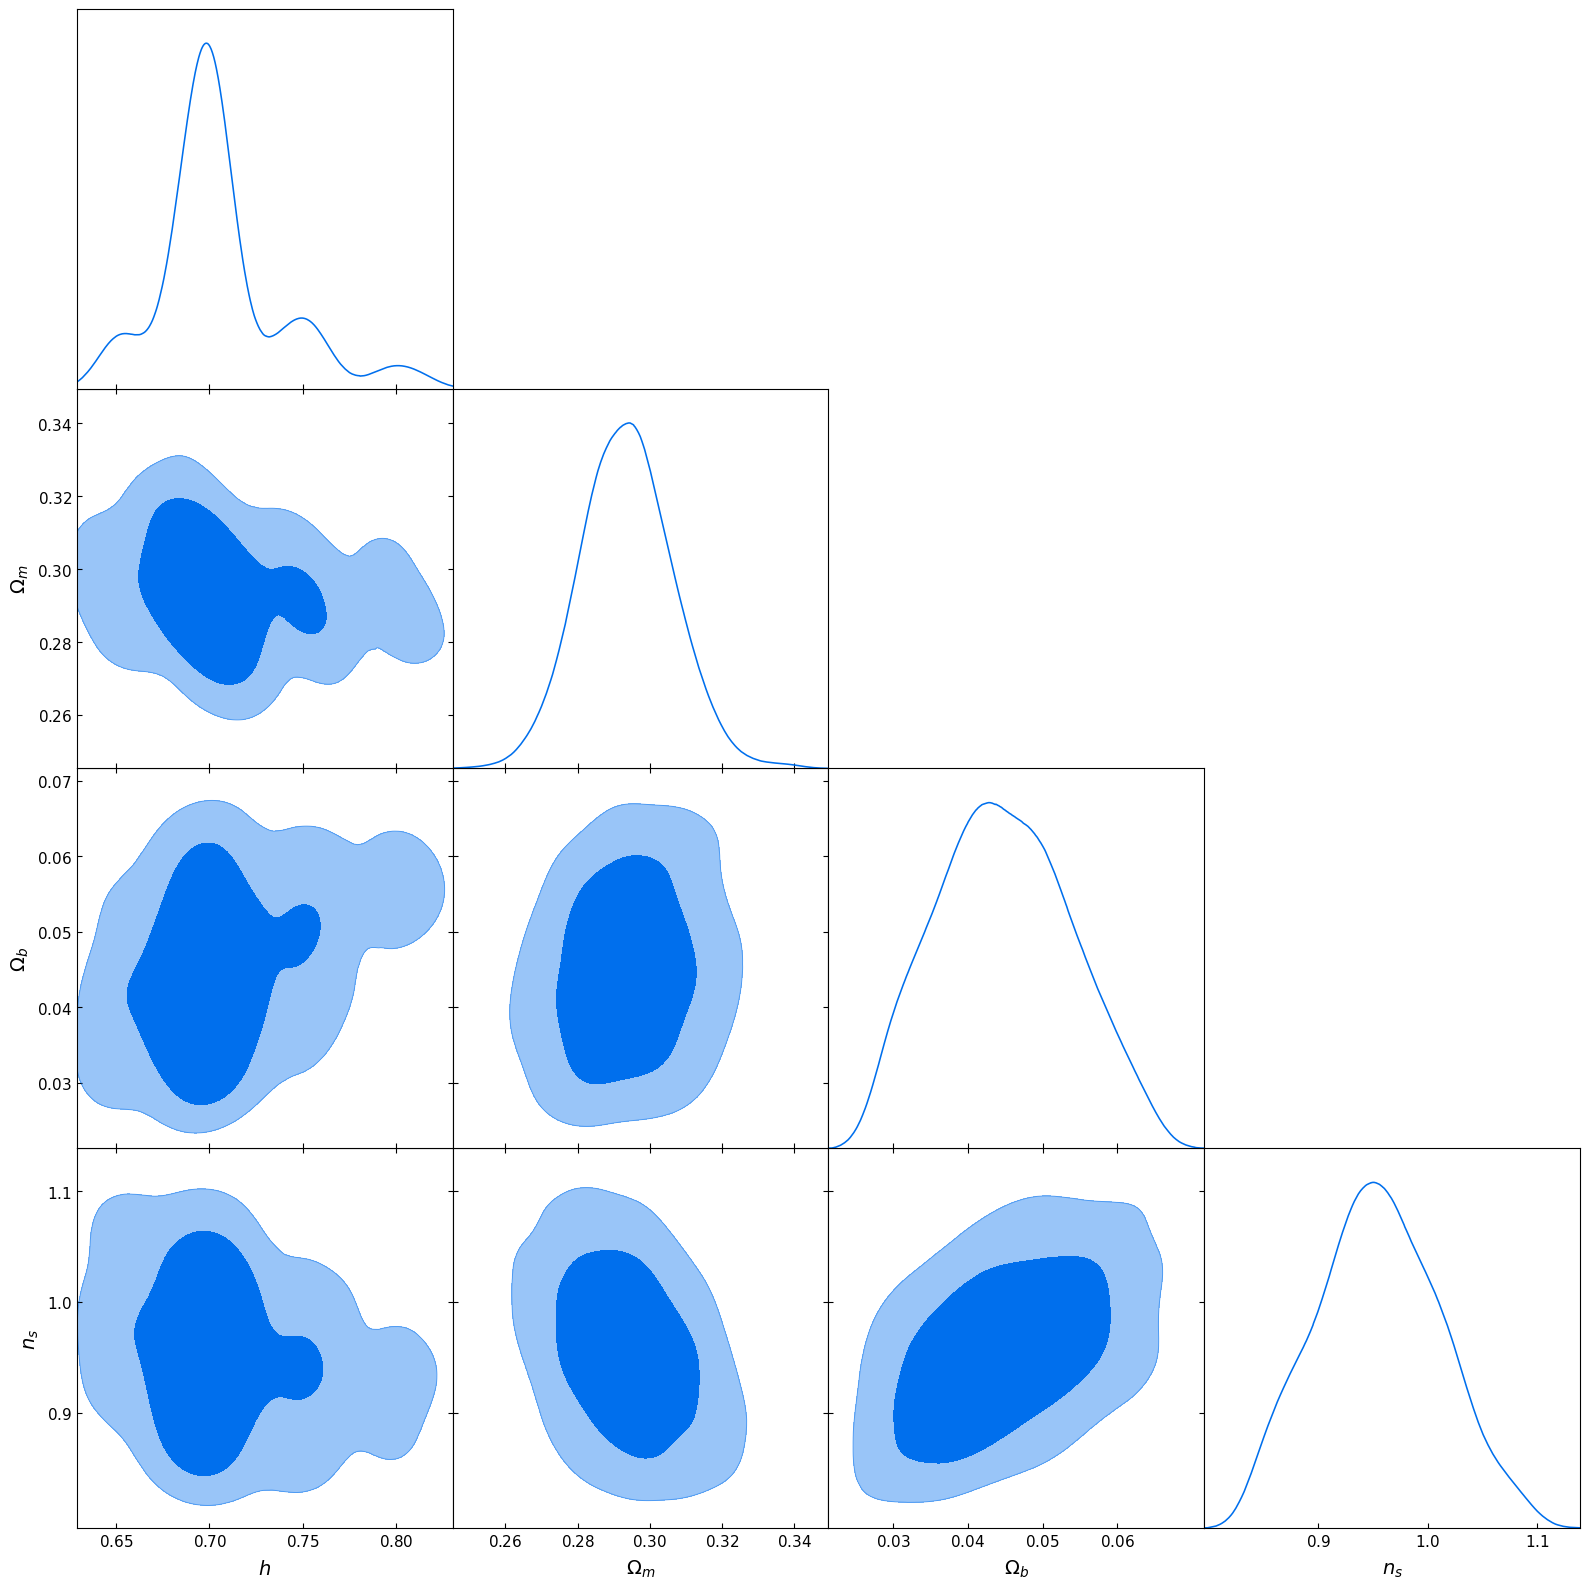

In [136]:
g = plots.getSubplotPlotter(subplot_size=4)
g.triangle_plot([ND_RSD_gp_samples],
                ['h','Ωm','Ωb', 'ns'], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/Growth_with_RSDs/Wm_gpgp.pdf')

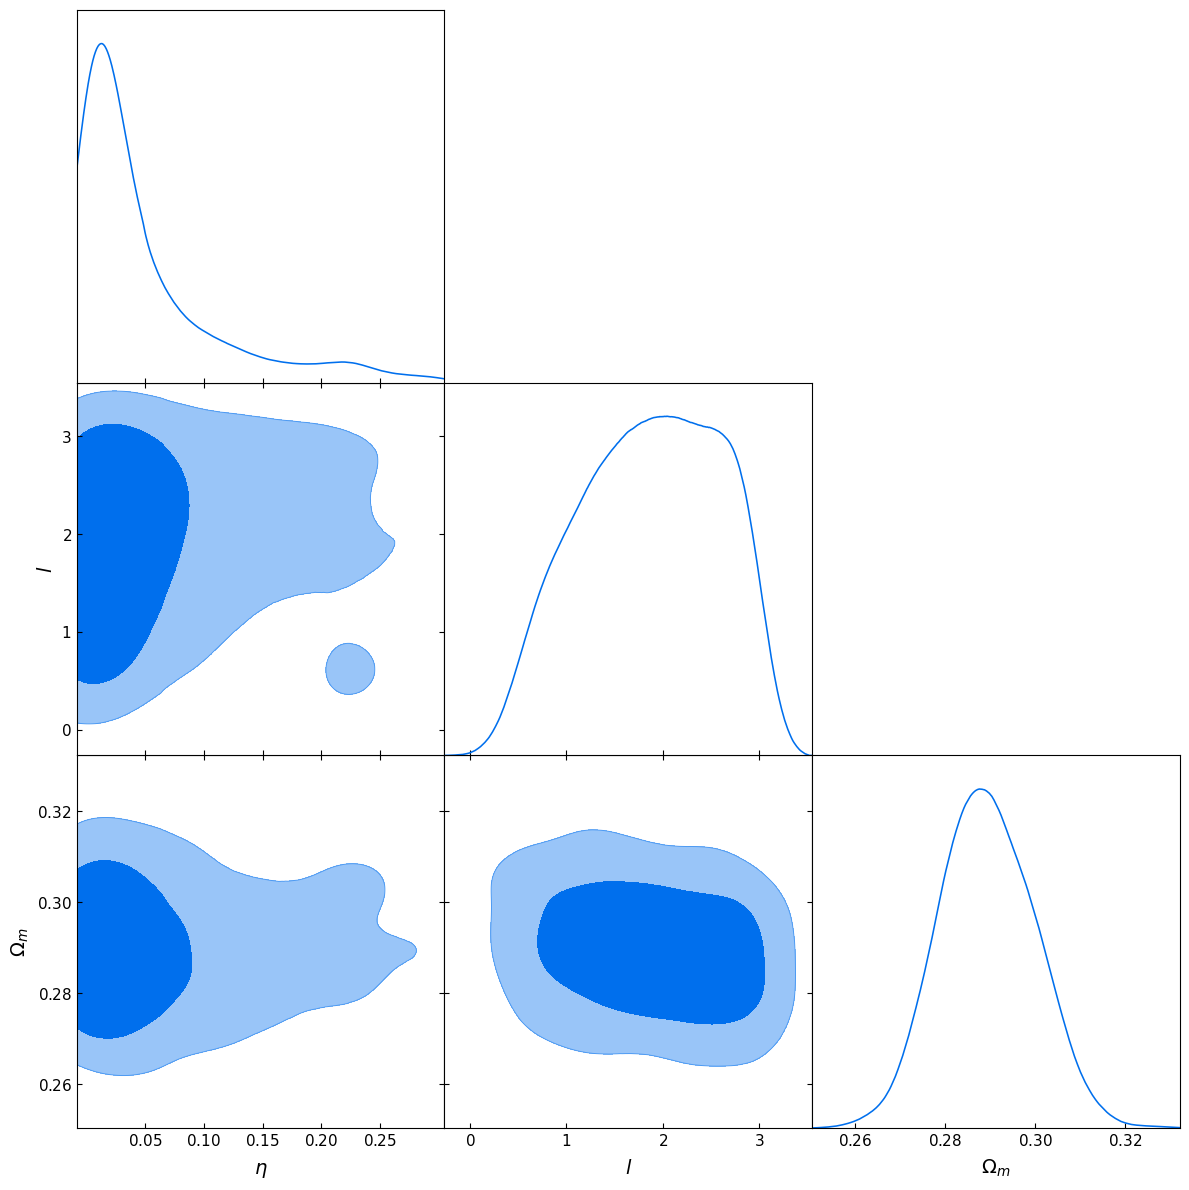

In [65]:
g = plots.getSubplotPlotter(subplot_size=4)
g.triangle_plot(ND_RSD_gp_hp_samples,
                ['eta', 'l', 'Ωm'], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/Growth_with_RSDs/Wm_gpgp.pdf')

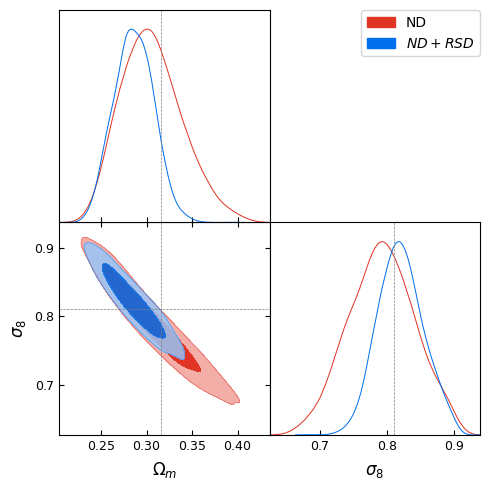

In [13]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([ND_samples, ND_RSD_samples], ['Ωm', 's8'], filled=True, 
                markers={'Ωm':0.315,
                         's8':0.811})
g.export('/mnt/c/Users/Jaime/Desktop/Growth_with_RSDs/Wms8.pdf')

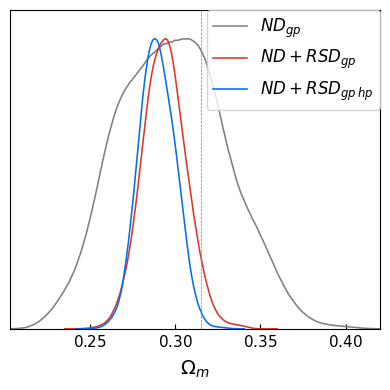

In [112]:
g = plots.getSubplotPlotter(subplot_size=4)
g.triangle_plot([ND_gp_samples, ND_RSD_gp_samples, ND_RSD_gp_hp_samples], ['Ωm'], filled=True, 
                markers={'Ωm':0.315})
g.export('/mnt/c/Users/Jaime/Desktop/Growth_with_RSDs/Wm_gpgp.pdf')

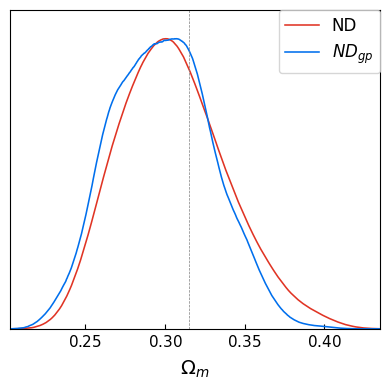

In [44]:
g = plots.getSubplotPlotter(subplot_size=4)
g.triangle_plot([ND_samples, ND_gp_samples,], ['Ωm'], filled=True, 
                markers={'Ωm':0.315})
g.export('/mnt/c/Users/Jaime/Desktop/Growth_with_RSDs/Wm_gp.pdf')

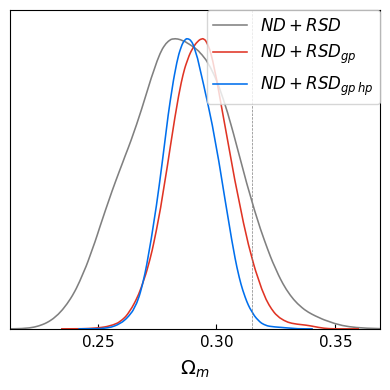

In [111]:
g = plots.getSubplotPlotter(subplot_size=4)
g.triangle_plot([ND_RSD_samples, ND_RSD_gp_samples, ND_RSD_gp_hp_samples], ['Ωm'], filled=True, 
                markers={'Ωm':0.315})
g.export('/mnt/c/Users/Jaime/Desktop/Growth_with_RSDs/Wm_RSD_gpgp.pdf')

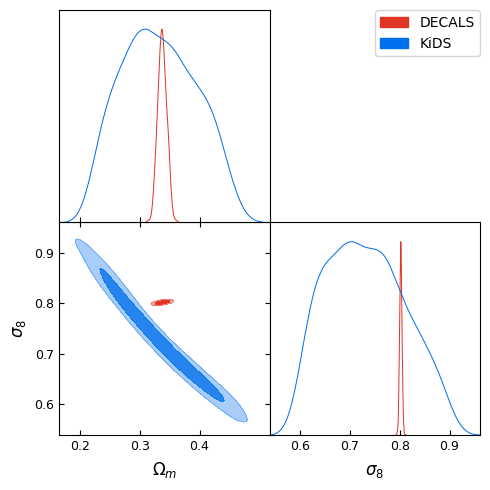

In [17]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DECALS_samples, KiDS_samples], ['Ωm', 's8'], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/DESY1_comp.pdf')

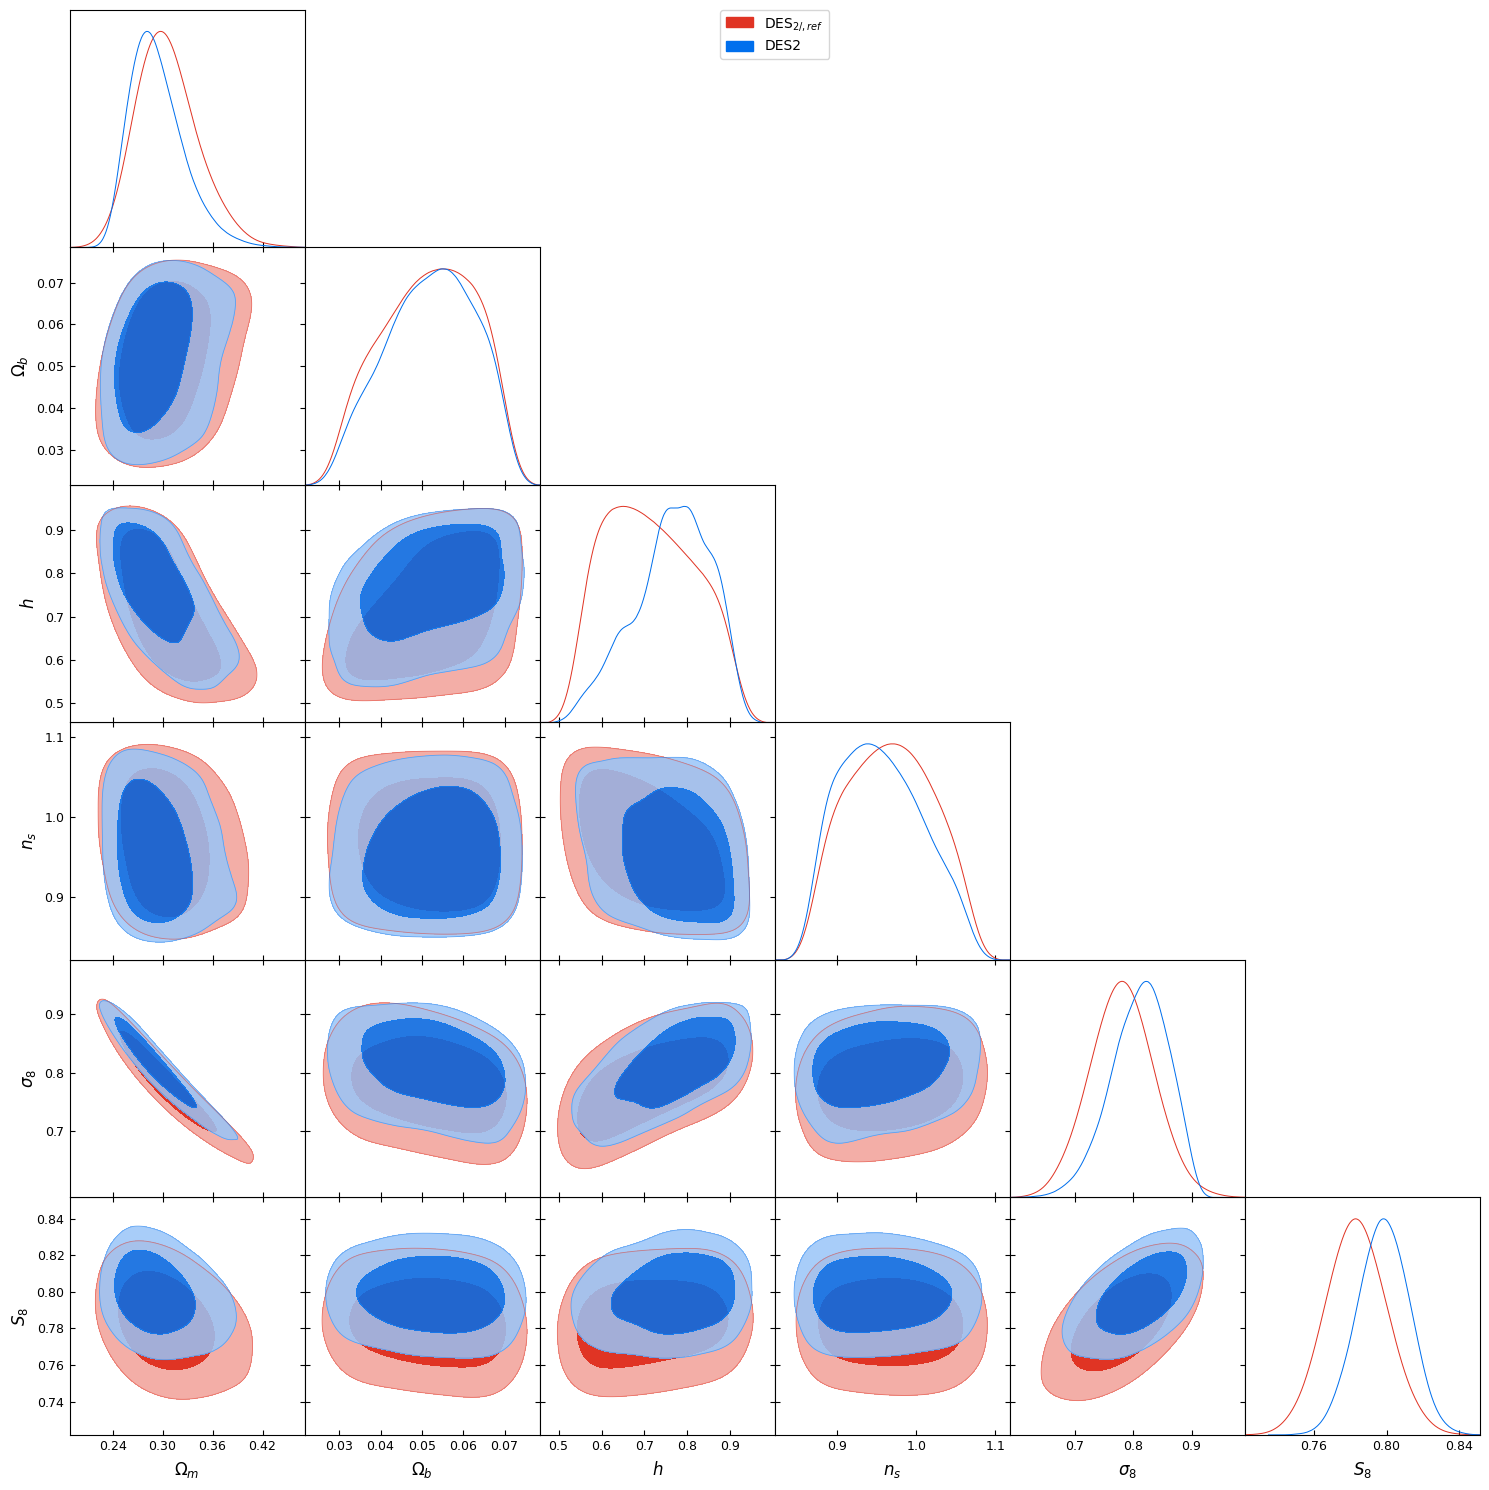

In [27]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DES2_ref_samples, DES2_samples],
                ['Ωm', 'Ωb', 'h', 'ns', 's8', 'S8'], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/DESY1_comp.pdf')

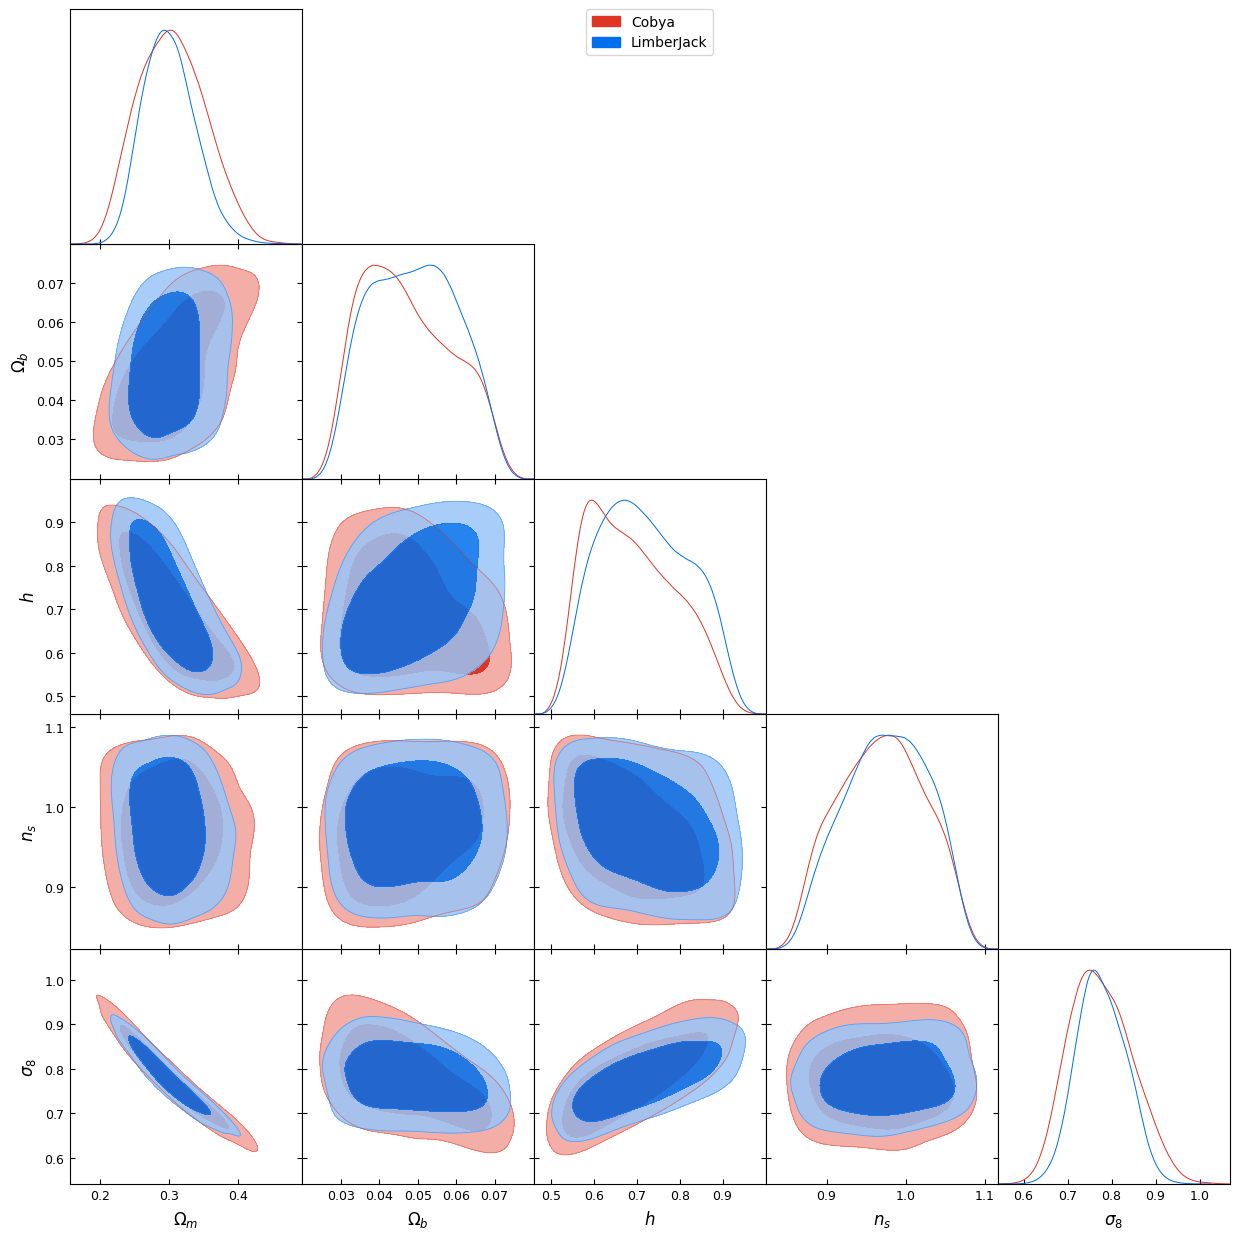

In [28]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DES_ref_samples,  DES_old_samples], ['Ωm', 'Ωb', 'h', 'ns', 's8'],
                filled=True, legend_labels=['Cobya', 'LimberJack'])
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/DESY1_comp.pdf')

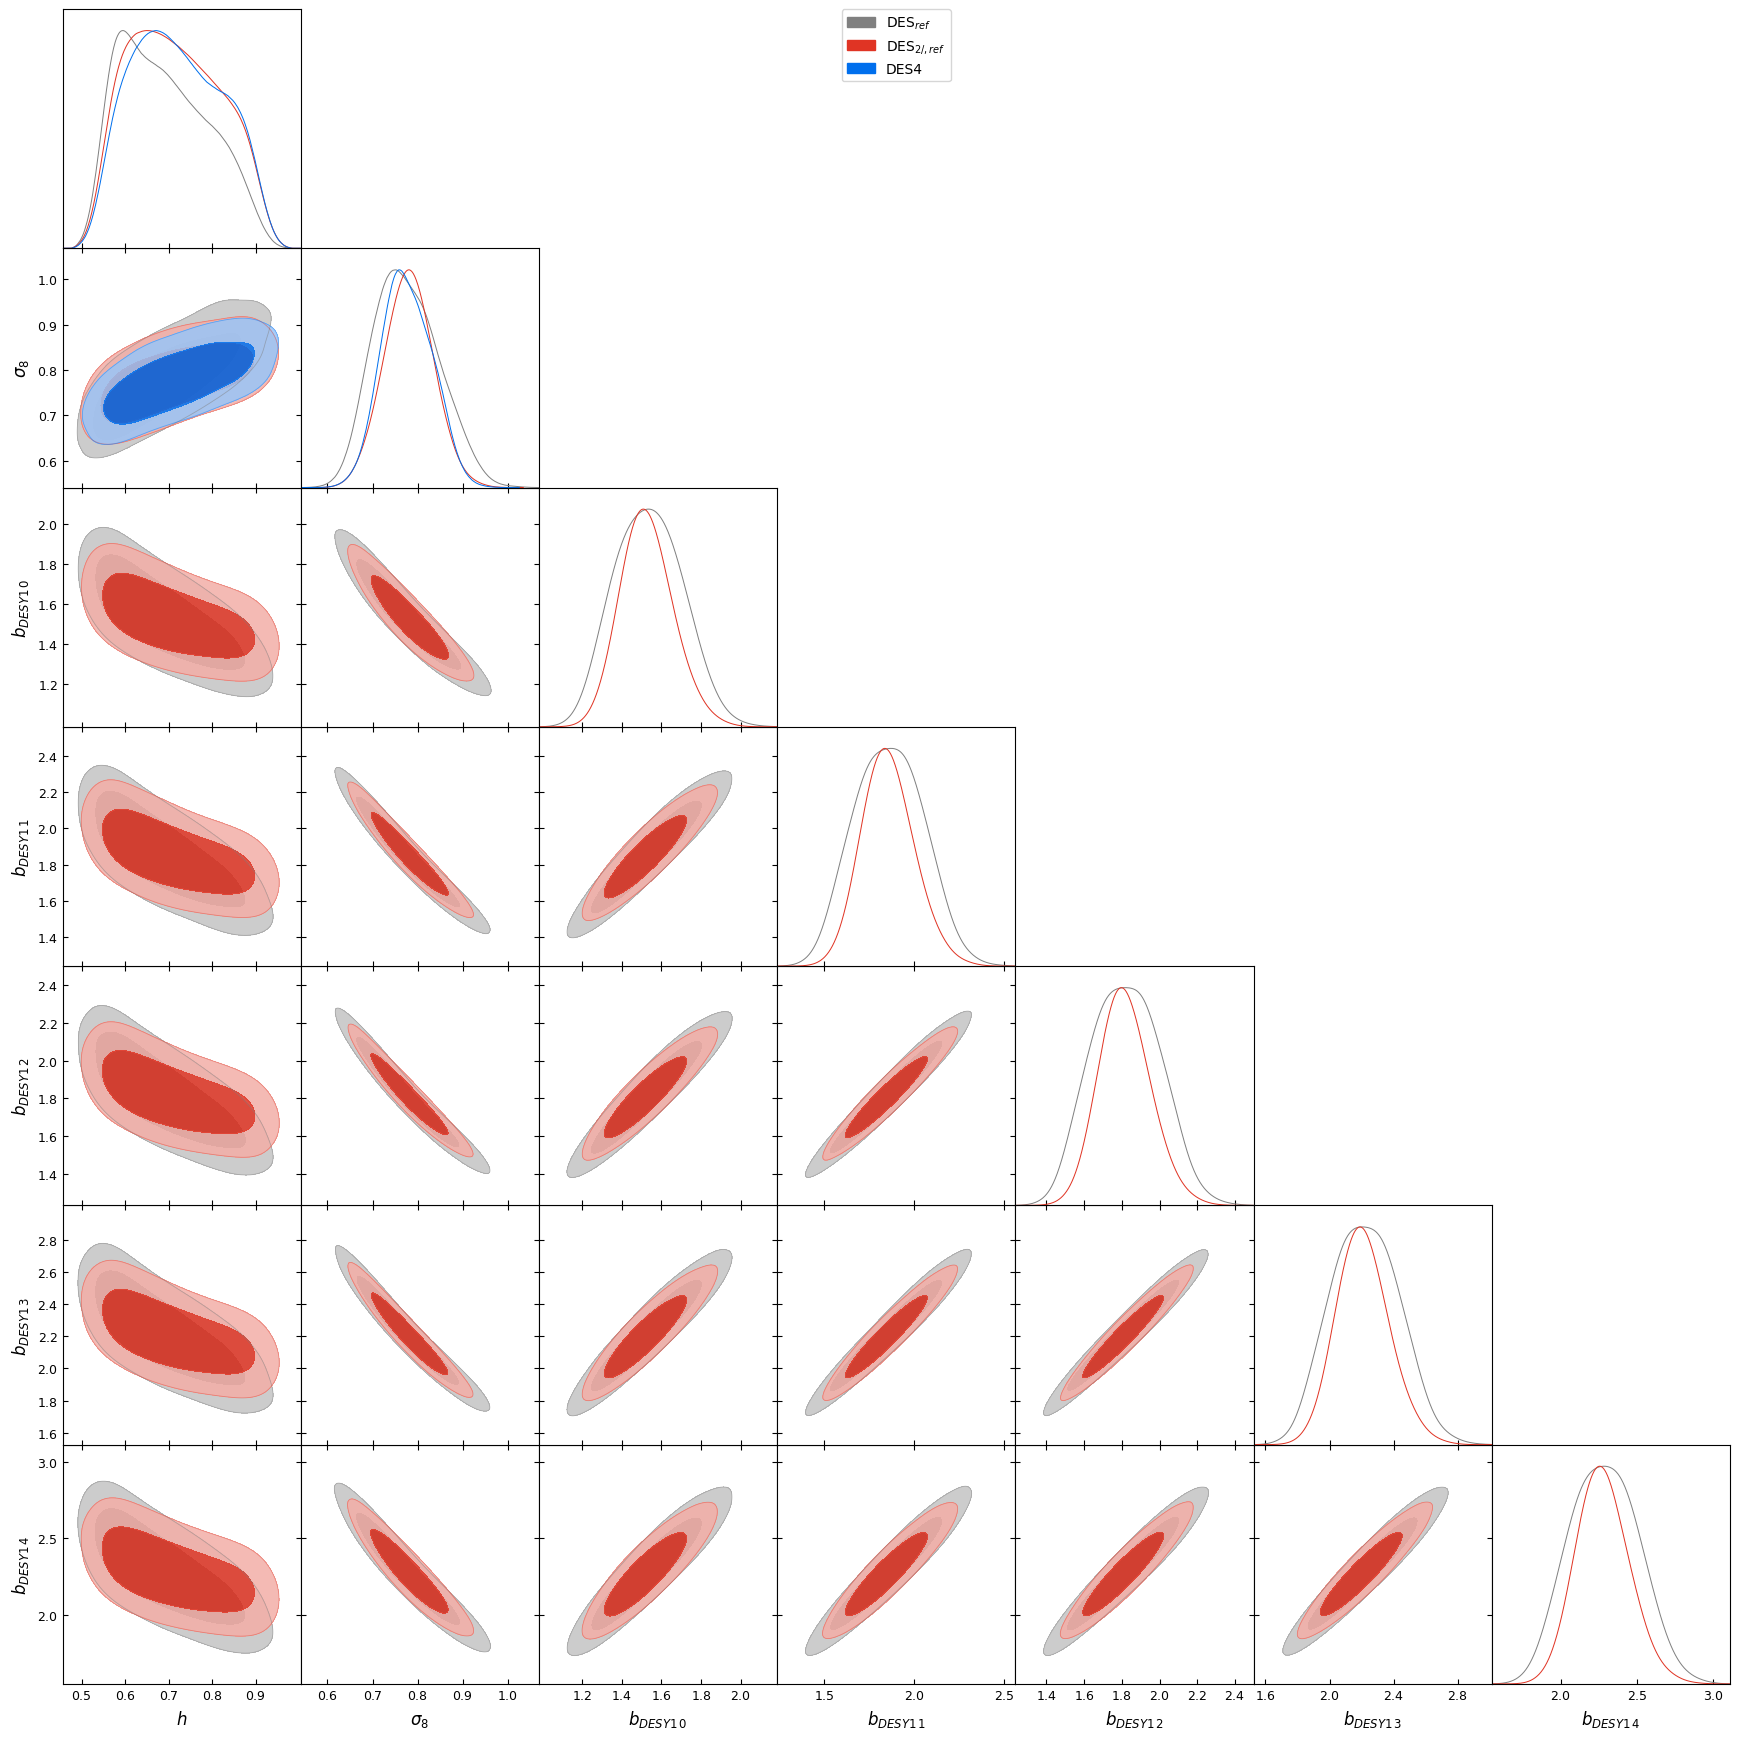

In [124]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DES_ref_samples, DES2_ref_samples, DES4_samples],
               ['h', 's8', 'DESgc__0_0_b', 'DESgc__1_0_b',
               'DESgc__2_0_b', 'DESgc__3_0_b',
               'DESgc__4_0_b',], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/DESY1_comp.pdf')

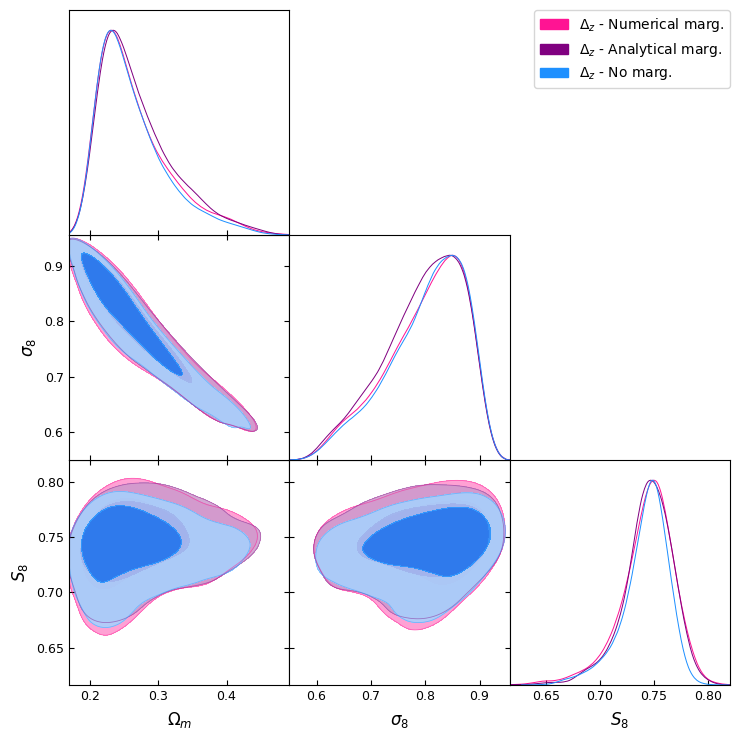

In [54]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([dzs_numerical_samples,
                 dzs_analytical_samples,
                 dzs_nomarg_samples],
                ['Ωm','s8', 'S8'], filled=True,
                legend_labels=[r'$\Delta_z$ - Numerical marg.',
                               r'$\Delta_z$ - Analytical marg.',
                               r'$\Delta_z$ - No marg.'], 
                line_args=[{'color':'deeppink'},
                           {'color':'purple'},
                           {'color':'dodgerblue'}], 
                colors=["deeppink", "purple", "dodgerblue"])
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/dz_DESY1.pdf')

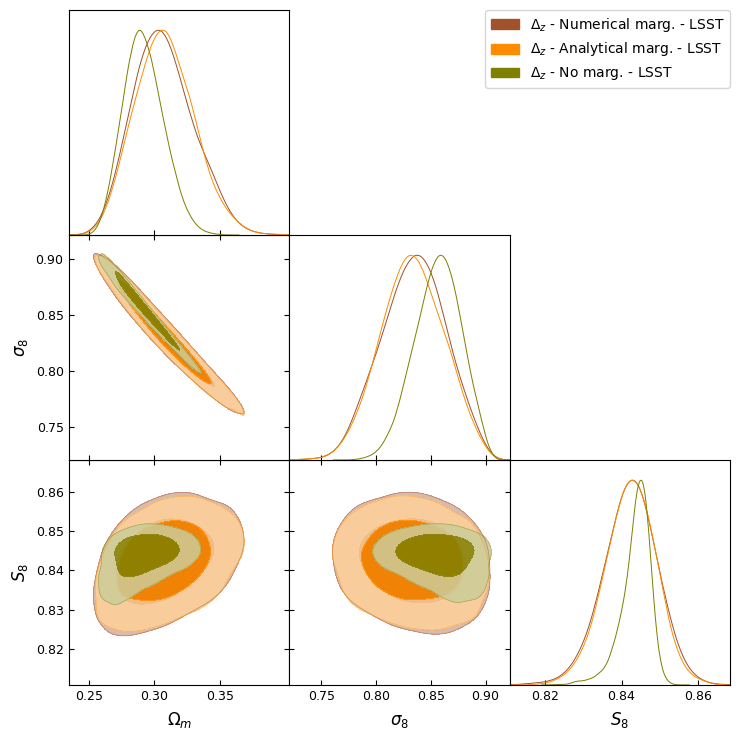

In [55]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([dzs_numerical_lsst_samples, 
                 dzs_analytical_lsst_samples,
                 dzs_nomarg_lsst_samples], 
                ['Ωm', 's8', 'S8'], filled=True,
                legend_labels=[r'$\Delta_z$ - Numerical marg. - LSST',
                               r'$\Delta_z$ - Analytical marg. - LSST',
                               r'$\Delta_z$ - No marg. - LSST'], 
                line_args=[{'color':'sienna'},
                           {'color':'darkorange'},
                           {'color':'olive'}], 
                colors=["sienna", "darkorange", "olive"])
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/dz_LSST.pdf')

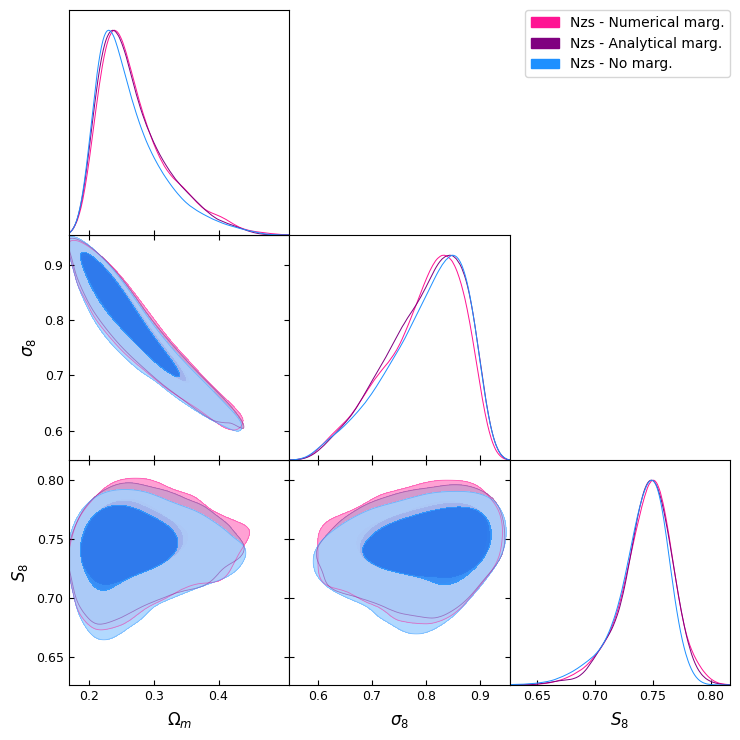

In [57]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([Nzs_numerical_samples, Nzs_anal_samples, Nzs_nomarg_samples],
                ['Ωm', 's8', 'S8'], filled=True,
                legend_labels=['Nzs - Numerical marg.',
                               'Nzs - Analytical marg.',
                               'Nzs - No marg.'],
               line_args=[{'color':'deeppink'},
                           {'color':'purple'},
                           {'color':'dodgerblue'}], 
                colors=["deeppink", "purple", "dodgerblue"])
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/Nz_DESY1.pdf')

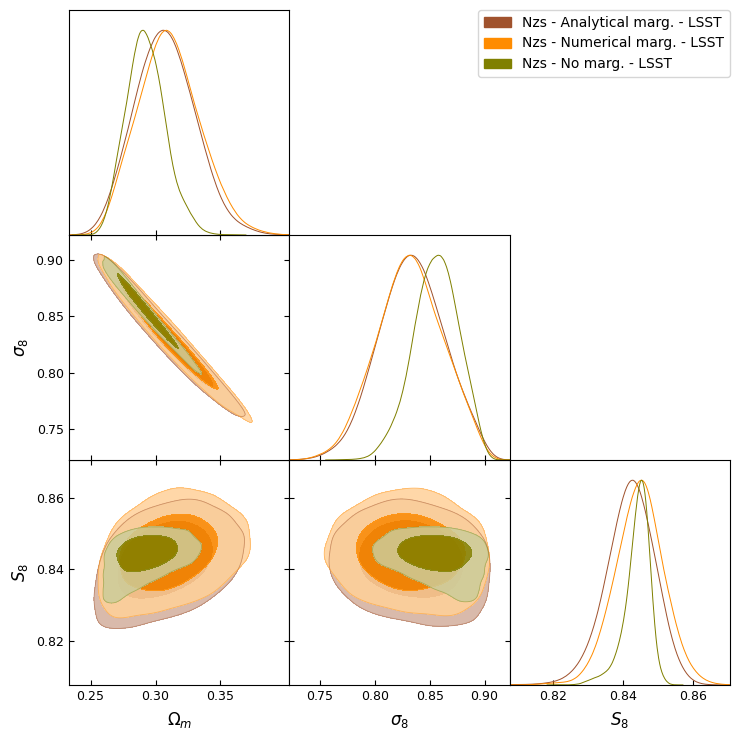

In [58]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([Nzs_anal_lsst_samples, Nzs_numerical_lsst_samples, Nzs_nomarg_lsst_samples],
                ['Ωm', 's8', 'S8'], filled=True,
                #markers={'Ωm':0.3, 's8': 0.84},
                legend_labels=['Nzs - Analytical marg. - LSST',
                               'Nzs - Numerical marg. - LSST',
                               'Nzs - No marg. - LSST'],
               line_args=[{'color':'sienna'},
                           {'color':'darkorange'},
                           {'color':'olive'}], 
                colors=["sienna", "darkorange", "olive"])
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/Nz_LSST.pdf')

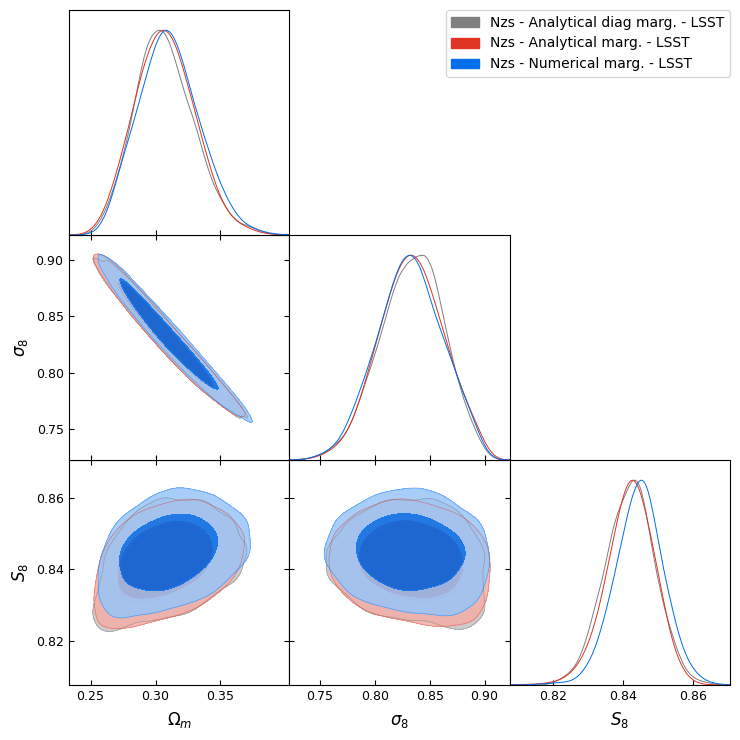

In [42]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([Nzs_anal_diag_lsst_samples, Nzs_anal_lsst_samples, Nzs_numerical_lsst_samples],
                ['Ωm', 's8', 'S8'], filled=True,
                #markers={'Ωm':0.3, 's8': 0.84},
                legend_labels=['Nzs - Analytical diag marg. - LSST',
                               'Nzs - Analytical marg. - LSST',
                               'Nzs - Numerical marg. - LSST'])
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/Nz_LSST.pdf')

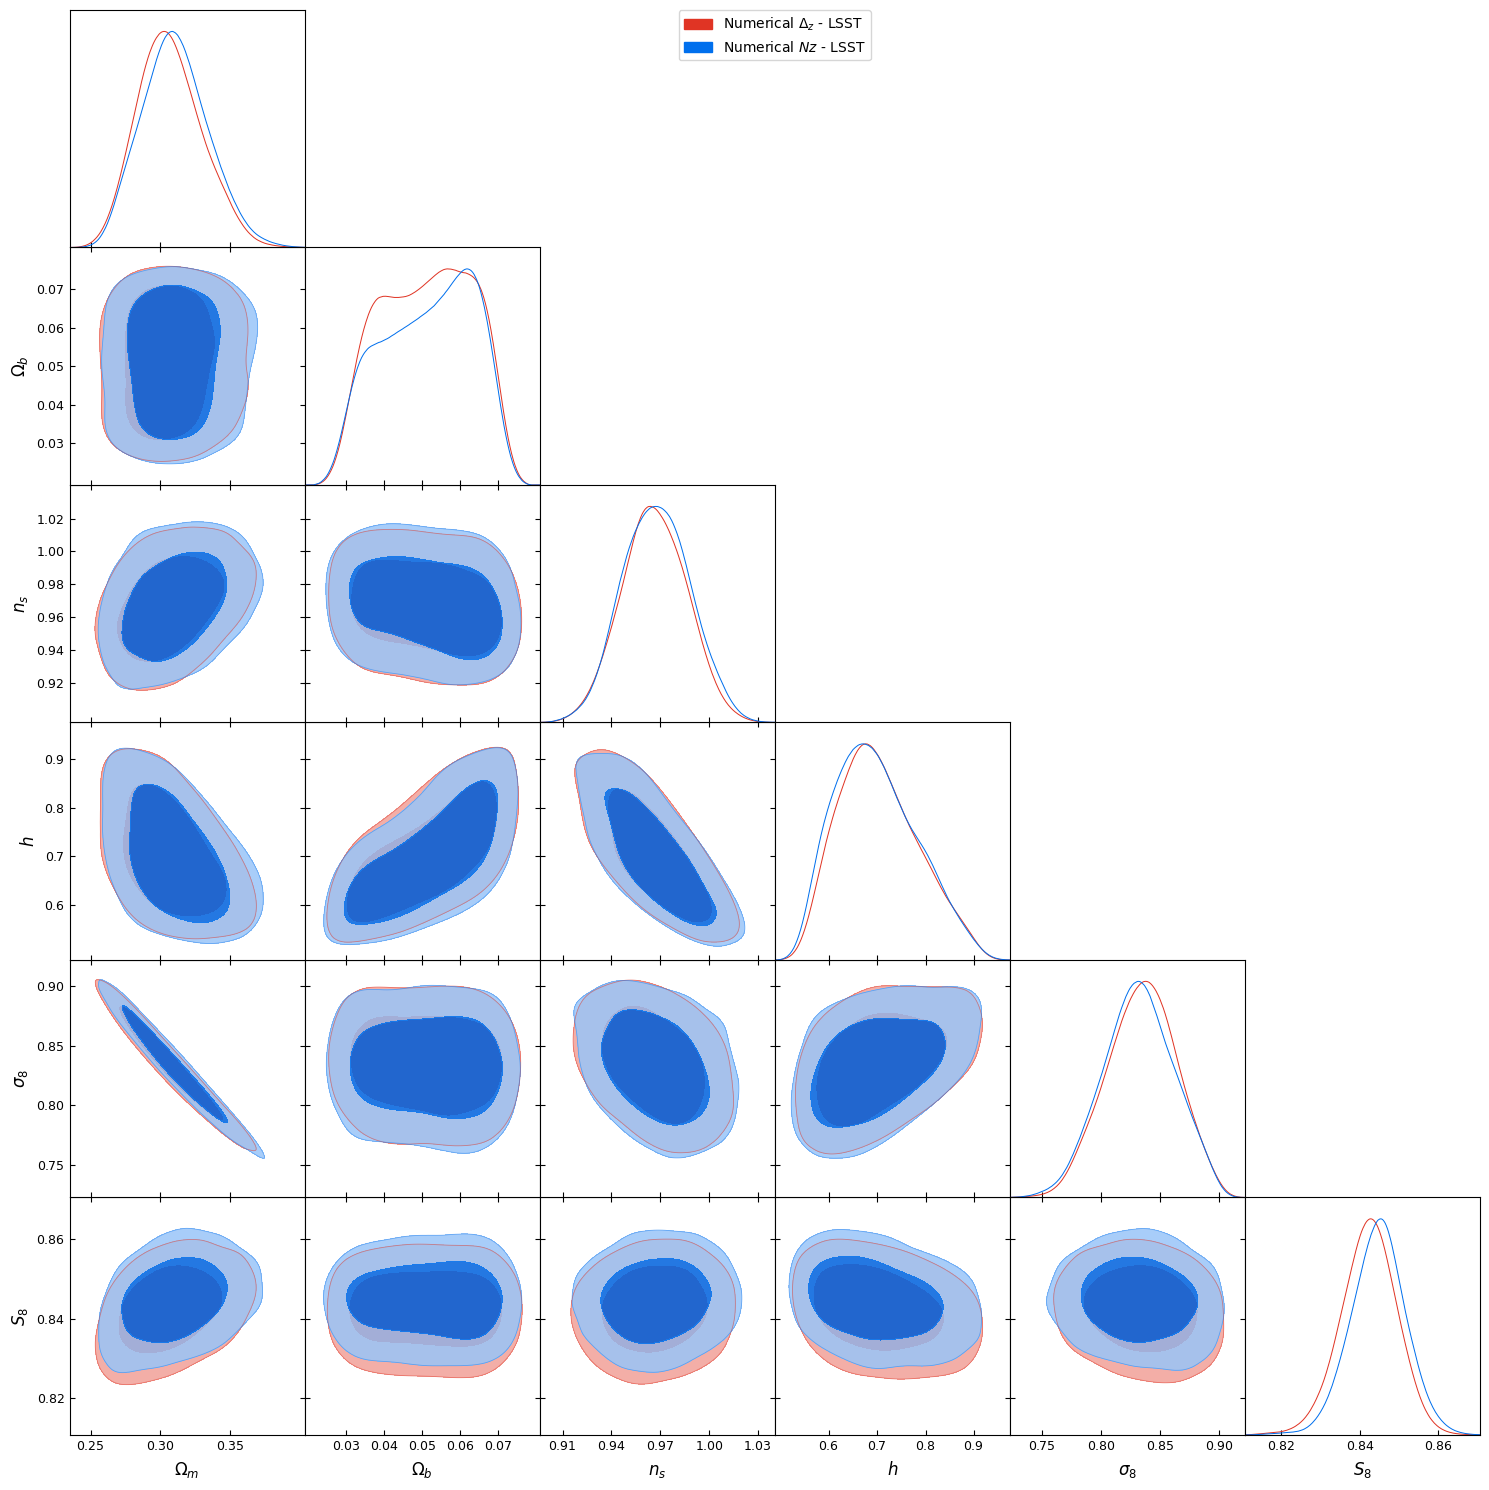

In [33]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([dzs_numerical_lsst_samples, Nzs_numerical_lsst_samples],
                ['Ωm', 'Ωb', 'ns', 'h', 's8', 'S8'], filled=True,
                legend_labels=['Numerical $\Delta_z$ - LSST',
                               'Numerical $Nz$ - LSST'])
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/Nz_dz_comp.pdf')

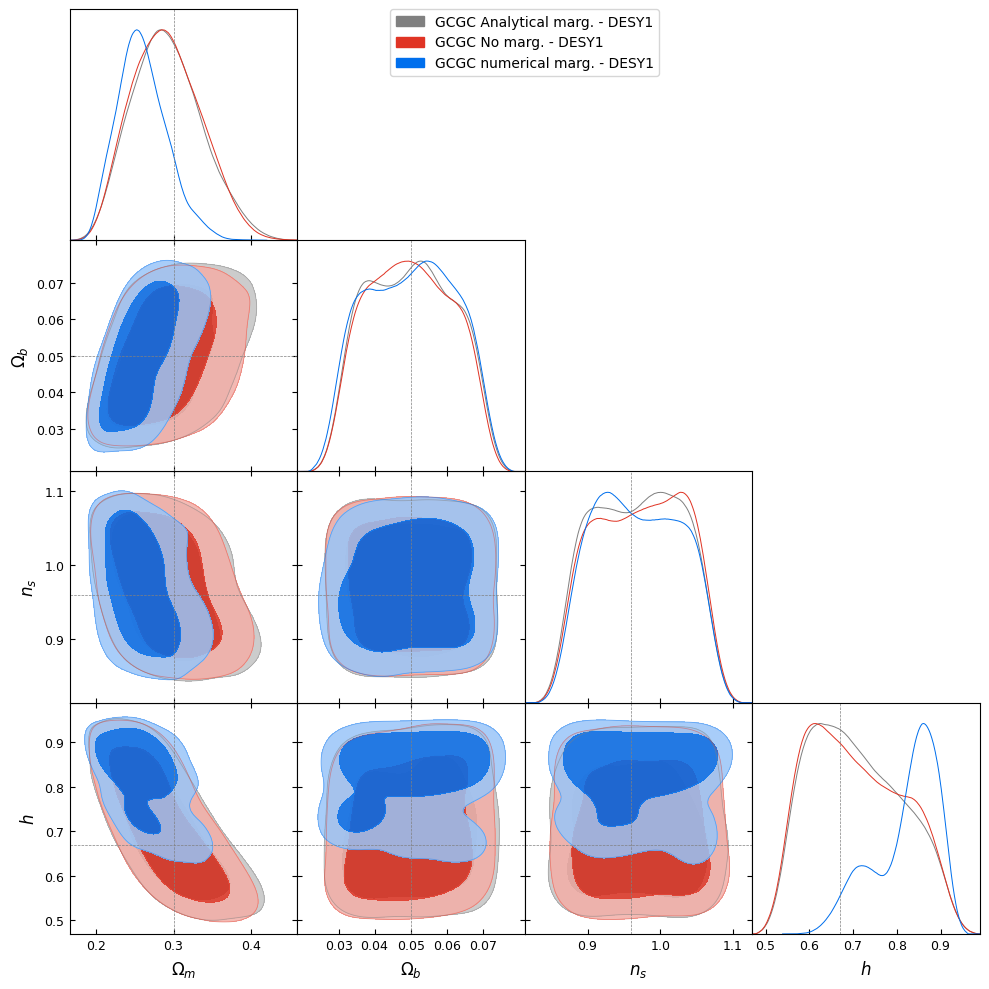

In [49]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([Nzs_gcgc_anal_lsst_samples,
                 Nzs_gcgc_nomarg_lsst_samples,
                 Nzs_gcgc_numerical_lsst_samples],
                ['Ωm', 'Ωb', 'ns', 'h'], filled=True,
                legend_labels=['GCGC Analytical marg. - DESY1',
                               'GCGC No marg. - DESY1',
                               'GCGC numerical marg. - DESY1',],
                markers={'Ωm':0.3, 'Ωb': 0.05, 'ns':0.96, 'h': 0.67})
#g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/Wm_s8_LSST.pdf')

In [135]:
Wms_anal = dzs_analytical['Ωm']
Wms_num = dzs_numerical['Ωm']
Wms_nomarg = dzs_nomarg['Ωm']

s8s_anal = dzs_analytical['s8']
s8s_num = dzs_numerical['s8']
s8s_nomarg = dzs_nomarg['s8']

S8s_anal = dzs_analytical['s8']*np.sqrt(dzs_analytical['Ωm']/0.3)
S8s_num = dzs_numerical['s8']*np.sqrt(dzs_numerical['Ωm']/0.3)
S8s_nomarg = dzs_nomarg['s8']*np.sqrt(dzs_nomarg['Ωm']/0.3)

Wm_anal_m, Wm_anal_s = round(np.mean(Wms_anal),3), round(np.std(Wms_anal),3)
Wm_num_m, Wm_num_s = round(np.mean(Wms_num),3), round(np.std(Wms_num),3)
Wm_nomarg_m, Wm_nomarg_s = round(np.mean(Wms_nomarg),3), round(np.std(Wms_nomarg),3)

s8_anal_m, s8_anal_s = round(np.mean(s8s_anal),3), round(np.std(s8s_anal),3)
s8_num_m, s8_num_s = round(np.mean(s8s_num),3), round(np.std(s8s_num),3)
s8_nomarg_m, s8_nomarg_s = round(np.mean(s8s_nomarg),3), round(np.std(s8s_nomarg),3)

S8_anal_m, S8_anal_s = round(np.mean(S8s_anal),3), round(np.std(S8s_anal),3)
S8_num_m, S8_num_s = round(np.mean(S8s_num),3), round(np.std(S8s_num),3)
S8_nomarg_m, S8_nomarg_s = round(np.mean(S8s_nomarg),3), round(np.std(S8s_nomarg),3)

print(Wm_nomarg_m, ' $\pm$', Wm_nomarg_s, '&', Wm_anal_m, '$\pm$', Wm_anal_s, '&', Wm_num_m, '$\pm$', Wm_num_s)
print(s8_nomarg_m, '$\pm$', s8_nomarg_s, '&', s8_anal_m, '$\pm$', s8_anal_s, '&', s8_num_m, '$\pm$', s8_num_s)
print(S8_nomarg_m, '$\pm$', S8_nomarg_s, '&', S8_anal_m, '$\pm$', S8_anal_s, '&', S8_num_m, '$\pm$', S8_num_s)

0.263  $\pm$ 0.049 & 0.269 $\pm$ 0.052 & 0.266 $\pm$ 0.052
0.802 $\pm$ 0.069 & 0.795 $\pm$ 0.07 & 0.8 $\pm$ 0.07
0.742 $\pm$ 0.021 & 0.744 $\pm$ 0.023 & 0.743 $\pm$ 0.025


In [136]:
Wms_anal = dzs_analytical_lsst['Ωm']
Wms_num = dzs_numerical_lsst['Ωm']
Wms_nomarg = dzs_nomarg_lsst['Ωm']

s8s_anal = dzs_analytical_lsst['s8']
s8s_num = dzs_numerical_lsst['s8']
s8s_nomarg = dzs_nomarg_lsst['s8']

S8s_anal = dzs_analytical_lsst['s8']*np.sqrt(dzs_analytical_lsst['Ωm']/0.3)
S8s_num = dzs_numerical_lsst['s8']*np.sqrt(dzs_numerical_lsst['Ωm']/0.3)
S8s_nomarg = dzs_nomarg_lsst['s8']*np.sqrt(dzs_nomarg_lsst['Ωm']/0.3)

Wm_anal_m, Wm_anal_s = round(np.mean(Wms_anal),3), round(np.std(Wms_anal),3)
Wm_num_m, Wm_num_s = round(np.mean(Wms_num),3), round(np.std(Wms_num),3)
Wm_nomarg_m, Wm_nomarg_s = round(np.mean(Wms_nomarg),3), round(np.std(Wms_nomarg),3)

s8_anal_m, s8_anal_s = round(np.mean(s8s_anal),3), round(np.std(s8s_anal),3)
s8_num_m, s8_num_s = round(np.mean(s8s_num),3), round(np.std(s8s_num),3)
s8_nomarg_m, s8_nomarg_s = round(np.mean(s8s_nomarg),3), round(np.std(s8s_nomarg),3)

S8_anal_m, S8_anal_s = round(np.mean(S8s_anal),3), round(np.std(S8s_anal),3)
S8_num_m, S8_num_s = round(np.mean(S8s_num),3), round(np.std(S8s_num),3)
S8_nomarg_m, S8_nomarg_s = round(np.mean(S8s_nomarg),3), round(np.std(S8s_nomarg),3)

print(Wm_nomarg_m, ' $\pm$', Wm_nomarg_s, '&', Wm_anal_m, '$\pm$', Wm_anal_s, '&', Wm_num_m, '$\pm$', Wm_num_s)
print(s8_nomarg_m, '$\pm$', s8_nomarg_s, '&', s8_anal_m, '$\pm$', s8_anal_s, '&', s8_num_m, '$\pm$', s8_num_s)
print(S8_nomarg_m, '$\pm$', S8_nomarg_s, '&', S8_anal_m, '$\pm$', S8_anal_s, '&', S8_num_m, '$\pm$', S8_num_s)

0.292  $\pm$ 0.015 & 0.308 $\pm$ 0.022 & 0.308 $\pm$ 0.021
0.856 $\pm$ 0.021 & 0.833 $\pm$ 0.028 & 0.832 $\pm$ 0.027
0.844 $\pm$ 0.004 & 0.842 $\pm$ 0.007 & 0.842 $\pm$ 0.007


In [56]:
Wms_anal = Nzs_anal['Ωm']
Wms_num = Nzs_numerical['Ωm']
Wms_nomarg = Nzs_nomarg['Ωm']

s8s_anal = Nzs_anal['s8']
s8s_num = Nzs_numerical['s8']
s8s_nomarg = Nzs_nomarg['s8']

S8s_anal = Nzs_anal['s8']*np.sqrt(Nzs_anal['Ωm']/0.3)
S8s_num = Nzs_numerical['s8']*np.sqrt(Nzs_numerical['Ωm']/0.3)
S8s_nomarg = Nzs_nomarg['s8']*np.sqrt(Nzs_nomarg['Ωm']/0.3)

Wm_anal_m, Wm_anal_s = round(np.mean(Wms_anal),3), round(np.std(Wms_anal),3)
Wm_num_m, Wm_num_s = round(np.mean(Wms_num),3), round(np.std(Wms_num),3)
Wm_nomarg_m, Wm_nomarg_s = round(np.mean(Wms_nomarg),3), round(np.std(Wms_nomarg),3)

s8_anal_m, s8_anal_s = round(np.mean(s8s_anal),3), round(np.std(s8s_anal),3)
s8_num_m, s8_num_s = round(np.mean(s8s_num),3), round(np.std(s8s_num),3)
s8_nomarg_m, s8_nomarg_s = round(np.mean(s8s_nomarg),3), round(np.std(s8s_nomarg),3)

S8_anal_m, S8_anal_s = round(np.mean(S8s_anal),3), round(np.std(S8s_anal),3)
S8_num_m, S8_num_s = round(np.mean(S8s_num),3), round(np.std(S8s_num),3)
S8_nomarg_m, S8_nomarg_s = round(np.mean(S8s_nomarg),3), round(np.std(S8s_nomarg),3)

print(Wm_nomarg_m, ' $\pm$', Wm_nomarg_s, '&', Wm_anal_m, '$\pm$', Wm_anal_s, '&', Wm_num_m, '$\pm$', Wm_num_s)
print(s8_nomarg_m, '$\pm$', s8_nomarg_s, '&', s8_anal_m, '$\pm$', s8_anal_s, '&', s8_num_m, '$\pm$', s8_num_s)
print(S8_nomarg_m, '$\pm$', S8_nomarg_s, '&', S8_anal_m, '$\pm$', S8_anal_s, '&', S8_num_m, '$\pm$', S8_num_s)

0.264  $\pm$ 0.052 & 0.268 $\pm$ 0.05 & 0.27 $\pm$ 0.052
0.799 $\pm$ 0.072 & 0.798 $\pm$ 0.069 & 0.794 $\pm$ 0.069
0.741 $\pm$ 0.023 & 0.745 $\pm$ 0.021 & 0.745 $\pm$ 0.022


In [57]:
Wms_anal = Nzs_anal_lsst['Ωm']
Wms_num = Nzs_numerical_lsst['Ωm']
Wms_nomarg = Nzs_nomarg_lsst['Ωm']

s8s_anal = Nzs_anal_lsst['s8']
s8s_num = Nzs_numerical_lsst['s8']
s8s_nomarg = Nzs_nomarg_lsst['s8']

S8s_anal = Nzs_anal_lsst['s8']*np.sqrt(Nzs_anal_lsst['Ωm']/0.3)
S8s_num = Nzs_numerical_lsst['s8']*np.sqrt(Nzs_numerical_lsst['Ωm']/0.3)
S8s_nomarg = Nzs_nomarg_lsst['s8']*np.sqrt(Nzs_nomarg_lsst['Ωm']/0.3)

Wm_anal_m, Wm_anal_s = round(np.mean(Wms_anal),3), round(np.std(Wms_anal),3)
Wm_num_m, Wm_num_s = round(np.mean(Wms_num),3), round(np.std(Wms_num),3)
Wm_nomarg_m, Wm_nomarg_s = round(np.mean(Wms_nomarg),3), round(np.std(Wms_nomarg),3)

s8_anal_m, s8_anal_s = round(np.mean(s8s_anal),3), round(np.std(s8s_anal),3)
s8_num_m, s8_num_s = round(np.mean(s8s_num),3), round(np.std(s8s_num),3)
s8_nomarg_m, s8_nomarg_s = round(np.mean(s8s_nomarg),3), round(np.std(s8s_nomarg),3)

S8_anal_m, S8_anal_s = round(np.mean(S8s_anal),3), round(np.std(S8s_anal),3)
S8_num_m, S8_num_s = round(np.mean(S8s_num),3), round(np.std(S8s_num),3)
S8_nomarg_m, S8_nomarg_s = round(np.mean(S8s_nomarg),3), round(np.std(S8s_nomarg),3)

print(Wm_nomarg_m, ' $\pm$', Wm_nomarg_s, '&', Wm_anal_m, '$\pm$', Wm_anal_s, '&', Wm_num_m, '$\pm$', Wm_num_s)
print(s8_nomarg_m, '$\pm$', s8_nomarg_s, '&', s8_anal_m, '$\pm$', s8_anal_s, '&', s8_num_m, '$\pm$', s8_num_s)
print(S8_nomarg_m, '$\pm$', S8_nomarg_s, '&', S8_anal_m, '$\pm$', S8_anal_s, '&', S8_num_m, '$\pm$', S8_num_s)

0.293  $\pm$ 0.015 & 0.307 $\pm$ 0.023 & 0.31 $\pm$ 0.023
0.855 $\pm$ 0.02 & 0.834 $\pm$ 0.029 & 0.832 $\pm$ 0.029
0.844 $\pm$ 0.004 & 0.842 $\pm$ 0.007 & 0.845 $\pm$ 0.007


# Nzs

In [138]:
Nz0_data = np.load("../data/DESY1/binned_40_nzs/nz_DESwl__0_e.npz")
Nz1_data = np.load("../data/DESY1/binned_40_nzs/nz_DESwl__1_e.npz")
Nz2_data = np.load("../data/DESY1/binned_40_nzs/nz_DESwl__2_e.npz")
Nz3_data = np.load("../data/DESY1/binned_40_nzs/nz_DESwl__3_e.npz");

In [139]:
def make_nzs(file, binn):
    nz_names = file.keys()
    sel = [str(binn) + "_e_nz" in name for name in nz_names]
    nz_names = nz_names[sel]
    print(nz_names)
    ms = np.array([])
    ss = np.array([])
    for name in nz_names:
        nz = np.array(file[name])
        ms = np.append(ms, np.mean(nz))
        ss = np.append(ss, np.std(nz))
    return ms, ss

In [141]:
Nz_s8_0_m, Nz_s8_0_s = make_nzs(Nzs_numerical, 0)
Nz_s8_1_m, Nz_s8_1_s = make_nzs(Nzs_numerical, 1)
Nz_s8_2_m, Nz_s8_2_s = make_nzs(Nzs_numerical, 2)
Nz_s8_3_m, Nz_s8_3_s = make_nzs(Nzs_numerical, 3)

Index(['DESwl__0_e_nz[1]', 'DESwl__0_e_nz[2]', 'DESwl__0_e_nz[3]',
       'DESwl__0_e_nz[4]', 'DESwl__0_e_nz[5]', 'DESwl__0_e_nz[6]',
       'DESwl__0_e_nz[7]', 'DESwl__0_e_nz[8]', 'DESwl__0_e_nz[9]',
       'DESwl__0_e_nz[10]', 'DESwl__0_e_nz[11]', 'DESwl__0_e_nz[12]',
       'DESwl__0_e_nz[13]', 'DESwl__0_e_nz[14]', 'DESwl__0_e_nz[15]',
       'DESwl__0_e_nz[16]', 'DESwl__0_e_nz[17]', 'DESwl__0_e_nz[18]',
       'DESwl__0_e_nz[19]', 'DESwl__0_e_nz[20]', 'DESwl__0_e_nz[21]',
       'DESwl__0_e_nz[22]', 'DESwl__0_e_nz[23]', 'DESwl__0_e_nz[24]',
       'DESwl__0_e_nz[25]', 'DESwl__0_e_nz[26]', 'DESwl__0_e_nz[27]',
       'DESwl__0_e_nz[28]', 'DESwl__0_e_nz[29]', 'DESwl__0_e_nz[30]',
       'DESwl__0_e_nz[31]', 'DESwl__0_e_nz[32]', 'DESwl__0_e_nz[33]',
       'DESwl__0_e_nz[34]', 'DESwl__0_e_nz[35]', 'DESwl__0_e_nz[36]',
       'DESwl__0_e_nz[37]', 'DESwl__0_e_nz[38]', 'DESwl__0_e_nz[39]',
       'DESwl__0_e_nz[40]'],
      dtype='object')
Index(['DESwl__1_e_nz[1]', 'DESwl__1_e_nz[2]', '

In [142]:
Nz_lsst_s8_0_m, Nz_lsst_s8_0_s = make_nzs(Nzs_numerical_lsst, 0)
Nz_lsst_s8_1_m, Nz_lsst_s8_1_s = make_nzs(Nzs_numerical_lsst, 1)
Nz_lsst_s8_2_m, Nz_lsst_s8_2_s = make_nzs(Nzs_numerical_lsst, 2)
Nz_lsst_s8_3_m, Nz_lsst_s8_3_s = make_nzs(Nzs_numerical_lsst, 3)

Index(['DESwl__0_e_nz[1]', 'DESwl__0_e_nz[2]', 'DESwl__0_e_nz[3]',
       'DESwl__0_e_nz[4]', 'DESwl__0_e_nz[5]', 'DESwl__0_e_nz[6]',
       'DESwl__0_e_nz[7]', 'DESwl__0_e_nz[8]', 'DESwl__0_e_nz[9]',
       'DESwl__0_e_nz[10]', 'DESwl__0_e_nz[11]', 'DESwl__0_e_nz[12]',
       'DESwl__0_e_nz[13]', 'DESwl__0_e_nz[14]', 'DESwl__0_e_nz[15]',
       'DESwl__0_e_nz[16]', 'DESwl__0_e_nz[17]', 'DESwl__0_e_nz[18]',
       'DESwl__0_e_nz[19]', 'DESwl__0_e_nz[20]', 'DESwl__0_e_nz[21]',
       'DESwl__0_e_nz[22]', 'DESwl__0_e_nz[23]', 'DESwl__0_e_nz[24]',
       'DESwl__0_e_nz[25]', 'DESwl__0_e_nz[26]', 'DESwl__0_e_nz[27]',
       'DESwl__0_e_nz[28]', 'DESwl__0_e_nz[29]', 'DESwl__0_e_nz[30]',
       'DESwl__0_e_nz[31]', 'DESwl__0_e_nz[32]', 'DESwl__0_e_nz[33]',
       'DESwl__0_e_nz[34]', 'DESwl__0_e_nz[35]', 'DESwl__0_e_nz[36]',
       'DESwl__0_e_nz[37]', 'DESwl__0_e_nz[38]', 'DESwl__0_e_nz[39]',
       'DESwl__0_e_nz[40]'],
      dtype='object')
Index(['DESwl__1_e_nz[1]', 'DESwl__1_e_nz[2]', '

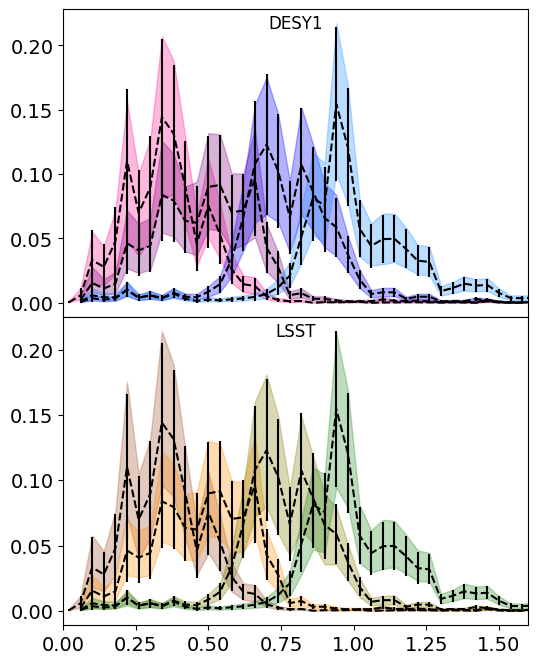

In [173]:
fig, axis = plt.subplots(2, 1, figsize=(6,8))
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[0].errorbar(Nz0_data["z"], Nz0_data["dndz"], 
             yerr=np.sqrt(np.diag(Nz0_data["cov"])),
             fmt="k--")
axis[0].fill_between(Nz0_data["z"], Nz_s8_0_m+Nz_s8_0_s,
                     Nz_s8_0_m-Nz_s8_0_s, color='deeppink', alpha=.3)
axis[0].errorbar(Nz1_data["z"], Nz1_data["dndz"], 
             yerr=np.sqrt(np.diag(Nz1_data["cov"])),
             fmt="k--")
axis[0].fill_between(Nz1_data["z"], Nz_s8_1_m+Nz_s8_1_s,
                     Nz_s8_1_m-Nz_s8_1_s, color='purple', alpha=.3)
axis[0].errorbar(Nz2_data["z"], Nz2_data["dndz"], 
             yerr=np.sqrt(np.diag(Nz2_data["cov"])),
             fmt="k--")
axis[0].fill_between(Nz2_data["z"], Nz_s8_2_m+Nz_s8_2_s,
                     Nz_s8_2_m-Nz_s8_2_s, color='blue', alpha=.3)
axis[0].errorbar(Nz3_data["z"], Nz3_data["dndz"], 
             yerr=np.sqrt(np.diag(Nz3_data["cov"])),
             fmt="k--")
axis[0].fill_between(Nz3_data["z"], Nz_s8_3_m+Nz_s8_3_s,
                     Nz_s8_3_m-Nz_s8_3_s, color='dodgerblue', alpha=.3)
axis[0].set_title("DESY1",  y=1.0, pad=-14)
axis[0].set_xlim(0, 1.6)
axis[0].set_xticks([])

axis[1].errorbar(Nz0_data["z"], Nz0_data["dndz"], 
             yerr=np.sqrt(np.diag(Nz0_data["cov"])),
             fmt="k--")
axis[1].fill_between(Nz0_data["z"], Nz_lsst_s8_0_m+Nz_s8_0_s,
                     Nz_lsst_s8_0_m-Nz_lsst_s8_0_s,
                     color='sienna', alpha=.3)
axis[1].errorbar(Nz1_data["z"], Nz1_data["dndz"], 
             yerr=np.sqrt(np.diag(Nz1_data["cov"])),
             fmt="k--")
axis[1].fill_between(Nz1_data["z"], Nz_lsst_s8_1_m+Nz_lsst_s8_1_s,
                     Nz_lsst_s8_1_m-Nz_lsst_s8_1_s,
                     color='darkorange', alpha=.3)
axis[1].errorbar(Nz2_data["z"], Nz2_data["dndz"], 
             yerr=np.sqrt(np.diag(Nz2_data["cov"])),
             fmt="k--")
axis[1].fill_between(Nz2_data["z"], Nz_lsst_s8_2_m+Nz_lsst_s8_2_s,
                     Nz_lsst_s8_2_m-Nz_lsst_s8_2_s,
                     color='olive', alpha=.3)
axis[1].errorbar(Nz3_data["z"], Nz3_data["dndz"], 
             yerr=np.sqrt(np.diag(Nz3_data["cov"])),
             fmt="k--")
axis[1].fill_between(Nz3_data["z"], Nz_lsst_s8_3_m+Nz_lsst_s8_3_s,
                     Nz_lsst_s8_3_m-Nz_s8_3_s,
                     color='forestgreen', alpha=.3)
axis[1].set_title("LSST",  y=1.0, pad=-14)
axis[1].set_xlim(0, 1.6)
plt.savefig("/mnt/c/Users/jaime/Desktop/Nz_paper_plots/Nzs.pdf")

# GP's

In [99]:
import pyccl as ccl 

In [100]:
gp_z = np.linspace(0, 3, 11)
z_fine = np.linspace(0, 3, 100)
fid_cosmo = ccl.CosmologyVanillaLCDM()
LCDM_Dz = ccl.growth_factor(fid_cosmo, 1/(1+gp_z))

In [101]:
def add_gps(path):
    gps = []
    i = 1 
    while os.path.isfile(path+"gp_{}.npz".format(i)):
        gp = np.load(path+"gp_{}.npz".format(1))
        gps.append(gp)
        i += 1
    return np.concatenate(gps, 1)

In [102]:
def add_Dzs(path):
    gps = []
    i = 1 
    while os.path.isfile(path+"Dz_{}.npz".format(i)):
        gp = np.load(path+"Dz_{}.npz".format(1))
        gps.append(gp)
        i += 1
    return np.concatenate(gps, 1)

In [103]:
Dz_ND = add_Dzs("../chains/ND_TAP_0.6/")
Dz_ND_RSD = add_Dzs("../chains/ND_RSD_TAP_0.6/")

In [104]:
gp_ND = add_gps("../chains/ND_gp_hp_TAP_0.6/")
gp_SD = add_gps("../chains/SD_gp_hp_TAP_0.6/")
gp_DES = add_gps("../chains/DES_full_gp_nos8_2_TAP_0.6/")
gp_ND_RSD = add_gps("../chains/ND_RSD_gp_TAP_0.6/")
gp_ND_RSD_hp = add_gps("../chains/ND_RSD_gp_hp_TAP_0.6/")
gp_DES_RSD = add_gps("../chains/gcgc_gcwl_wlwl_fs8_TAP_0.6/")

In [105]:
def get_m_s(file):
    m = np.mean(file, 1)
    s = np.std(file, 1)
    p65 = np.percentile(file, 65, axis=1)
    p95 = np.percentile(file, 95, axis=1)
    s1 = p65-m
    s2 = p95-m
    return m, s, s1, s2

In [106]:
Dz_ND_m, Dz_ND_s, Dz_ND_s1, Dz_ND_s2 = get_m_s(Dz_ND)
Dz_ND_RSD_m, Dz_ND_RSD_s, Dz_ND_RSD_s1, gp_ND_RSD_s2 = get_m_s(Dz_ND_RSD)
gp_ND_m, gp_ND_s, gp_ND_s1, gp_ND_s2 = get_m_s(gp_ND)
gp_ND_RSD_m, gp_ND_RSD_s, gp_ND_RSD_s1, gp_ND_RSD_s2 = get_m_s(gp_ND_RSD)
gp_ND_RSD_hp_m, gp_ND_RSD_hp_s, gp_ND_RSD_hp_s1, gp_ND_RSD_hp_s2 = get_m_s(gp_ND_RSD_hp)
gp_SD_m, gp_SD_s, gp_SD_s1, gp_SD_s2 = get_m_s(gp_SD)
gp_DES_RSD_m, gp_DES_RSD_s, gp_DES_RSD_s1, gp_DES_RSD_s2 = get_m_s(gp_DES_RSD)
gp_DES_m, gp_DES_s, gp_DES_s1, gp_DES_s2 = get_m_s(gp_DES)

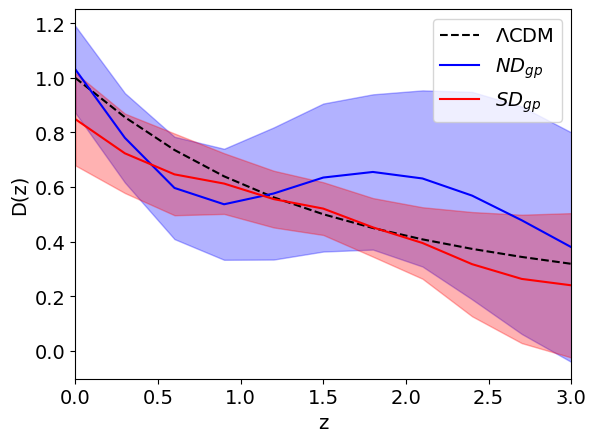

In [107]:
plt.plot(gp_z, LCDM_Dz, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, gp_ND_m, 'b-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, gp_ND_m+gp_ND_s, gp_ND_m-gp_ND_s, color='b', alpha=.3)

plt.plot(gp_z, gp_SD_m, 'r-', label=r"$SD_{gp}$")
plt.fill_between(gp_z, gp_SD_m+gp_SD_s, gp_SD_m-gp_SD_s, color='r', alpha=.3)

plt.xlabel("z")
plt.ylabel("D(z)")
plt.xlim(0, 3)
plt.legend()

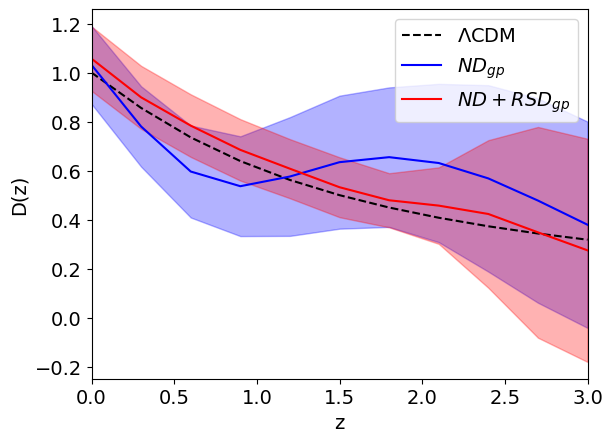

In [108]:
plt.plot(gp_z, LCDM_Dz, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, gp_ND_m, 'b-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, gp_ND_m+gp_ND_s, gp_ND_m-gp_ND_s, color='b', alpha=.3)

plt.plot(gp_z, gp_ND_RSD_m, 'r-', label=r"$ND+RSD_{gp}$")
plt.fill_between(gp_z, gp_ND_RSD_m+gp_ND_RSD_s, gp_ND_RSD_m-gp_ND_RSD_s, color='r', alpha=.3)

plt.xlabel("z")
plt.ylabel("D(z)")
plt.xlim(0, 3)
plt.legend()
plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/Dz_gp.pdf")

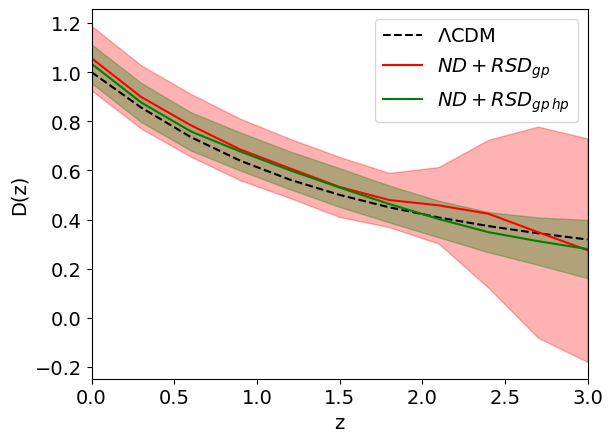

In [109]:
plt.plot(gp_z, LCDM_Dz, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, gp_ND_RSD_m, 'r-', label=r"$ND+RSD_{gp}$")
plt.fill_between(gp_z, gp_ND_RSD_m+gp_ND_RSD_s, gp_ND_RSD_m-gp_ND_RSD_s, color='r', alpha=.3)

plt.plot(gp_z, gp_ND_RSD_hp_m, 'g-', label=r"$ND+RSD_{gp \, hp}$")
plt.fill_between(gp_z, gp_ND_RSD_hp_m+gp_ND_RSD_hp_s, gp_ND_RSD_hp_m-gp_ND_RSD_hp_s, color='g', alpha=.3)

plt.xlabel("z")
plt.ylabel("D(z)")
plt.xlim(0, 3)
plt.legend()
plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/Dz_gp.pdf")

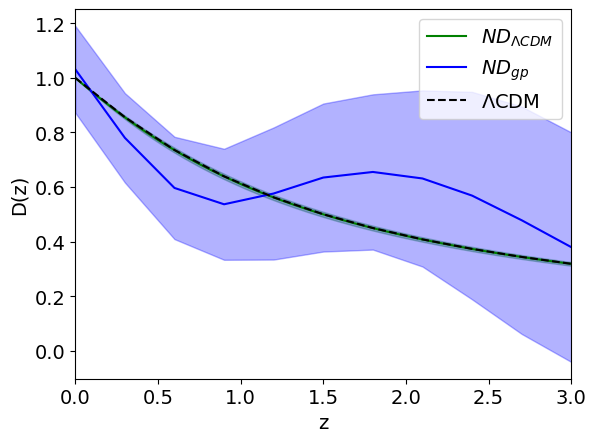

In [110]:
plt.plot(z_fine, Dz_ND_m, 'g-', label=r"$ND_{\Lambda CDM}$")
plt.fill_between(z_fine, Dz_ND_m+Dz_ND_s, Dz_ND_m-Dz_ND_s, color='g', alpha=.3)

plt.plot(gp_z, gp_ND_m, 'b-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, gp_ND_m+gp_ND_s, gp_ND_m-gp_ND_s, color='b', alpha=.3)

plt.plot(gp_z, LCDM_Dz, 'k--', label=r"$\Lambda$CDM")

plt.xlabel("z")
plt.ylabel("D(z)")
plt.xlim(0, 3)
plt.legend()
plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/Dz_gp.pdf")

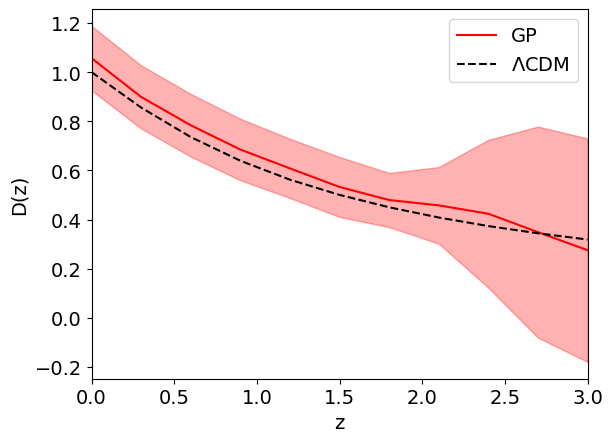

In [112]:
#plt.plot(z_fine, Dz_ND_RSD_m, 'c-', label=r"$ND+RSD_{\Lambda CDM}$")
#plt.fill_between(z_fine, Dz_ND_RSD_m+Dz_ND_RSD_s, Dz_ND_RSD_m-Dz_ND_RSD_s, color='c', alpha=.3)

plt.plot(gp_z, gp_ND_RSD_m, 'r-', label=r"GP")
plt.fill_between(gp_z, gp_ND_RSD_m+gp_ND_RSD_s, gp_ND_RSD_m-gp_ND_RSD_s, color='r', alpha=.3)

plt.plot(gp_z, LCDM_Dz, 'k--', label=r"$\Lambda$CDM")

plt.xlabel("z")
plt.ylabel("D(z)")
plt.xlim(0, 3)
plt.legend()
plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/Dz_gp.pdf")

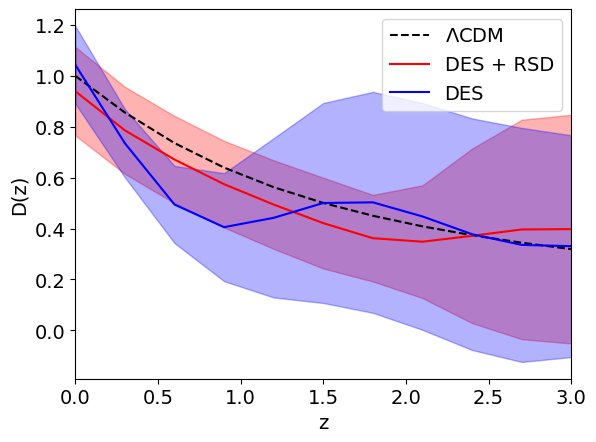

In [155]:
plt.plot(gp_z, LCDM_Dz, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, gp_DES_RSD_m, 'r-', label="DES + RSD")
plt.fill_between(gp_z, gp_DES_RSD_m+gp_DES_RSD_s, gp_DES_RSD_m-gp_DES_RSD_s, color='r', alpha=.3)

plt.plot(gp_z, gp_DES_m, 'b-', label="DES")
plt.fill_between(gp_z, gp_DES_m+gp_DES_s, gp_DES_m-gp_DES_s, color='b', alpha=.3)

plt.ylabel("D(z)")
plt.xlabel("z")
plt.xlim(0, 3)
plt.legend()

# S8z

In [118]:
LCDM_S8 = 0.811 * LCDM_Dz/LCDM_Dz[0]

In [119]:
def make_S8(gps, chain, mode="gp"):
    Ωms = np.array(chain["Ωm"])
    if mode == "lcdm":
        sigs = np.array(chain["s8"])
    else:
        sigs = 0.811 * np.ones(len(Ωms))
    s8s = [sigs[i] * np.transpose(gps)[i] / np.transpose(gps)[i][0] for i in np.arange(len(np.transpose(gps)))]
    S8s = [s8s[i] * np.sqrt(Ωms[i]/0.3) for i in np.arange(len(s8s))]
    return np.transpose(S8s)

In [120]:
S8_ND = make_S8(Dz_ND, ND, mode="lcdm")
S8_ND_RSD = make_S8(Dz_ND_RSD, ND_RSD, mode="lcdm")

S8_ND_gp = make_S8(gp_ND, ND_gp)
S8_SD_gp = make_S8(gp_SD, SD_gp)
S8_DES_gp = make_S8(gp_DES, DES)
S8_DES_RSD_gp = make_S8(gp_DES_RSD, DES_RSD_gp)
S8_ND_RSD_gp = make_S8(gp_ND_RSD, ND_RSD_gp)

In [121]:
S8_ND_m, S8_ND_s, S8_ND_s1, S8_ND_s2 = get_m_s(S8_ND)
S8_ND_RSD_m, S8_ND_RSD_s, S8_ND_RSD_s1, S8_ND_RSD_s2 = get_m_s(S8_ND_RSD)

In [122]:
S8_ND_gp_m, S8_ND_gp_s, S8_ND_gp_s1, S8_ND_gp_s2 = get_m_s(S8_ND_gp)
S8_SD_gp_m, S8_SD_gp_s, S8_SD_gp_s1, S8_SD_gp_s2 = get_m_s(S8_SD_gp)
S8_DES_gp_m, S8_DES_gp_s, S8_DES_gp_s1, S8_DES_gp_s2 = get_m_s(S8_DES_gp)
S8_DES_RSD_gp_m, S8_DES_RSD_gp_s, S8_DES_RSD_gp_s1, S8_DES_RSD_gp_s2 = get_m_s(S8_DES_RSD_gp)
S8_ND_RSD_gp_m, S8_ND_RSD_gp_s, S8_ND_RSD_gp_s1, S8_ND_RSD_gp_s2 = get_m_s(S8_ND_RSD_gp)

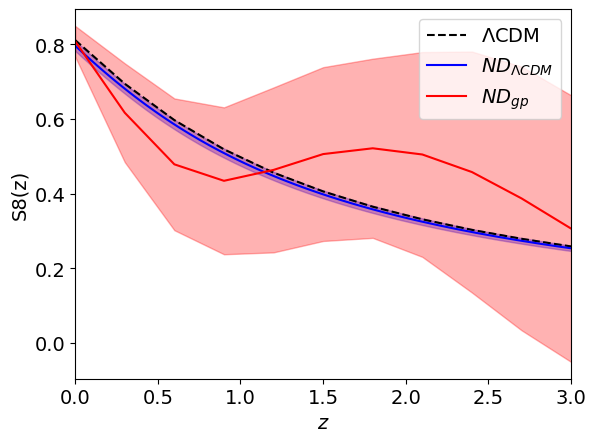

In [123]:
plt.plot(gp_z, LCDM_S8, 'k--', label=r"$\Lambda$CDM")

plt.plot(z_fine, S8_ND_m, 'b-', label=r"$ND_{\Lambda CDM}$")
plt.fill_between(z_fine, S8_ND_m+S8_ND_s, S8_ND_m-S8_ND_s, color='b', alpha=.3)

plt.plot(gp_z, S8_ND_gp_m, 'r-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, S8_ND_gp_m+S8_ND_gp_s, S8_ND_gp_m-S8_ND_gp_s, color='r', alpha=.3)

plt.xlabel(r"$z$")
plt.ylabel("S8(z)")
plt.xlim(0, 3)
plt.legend()

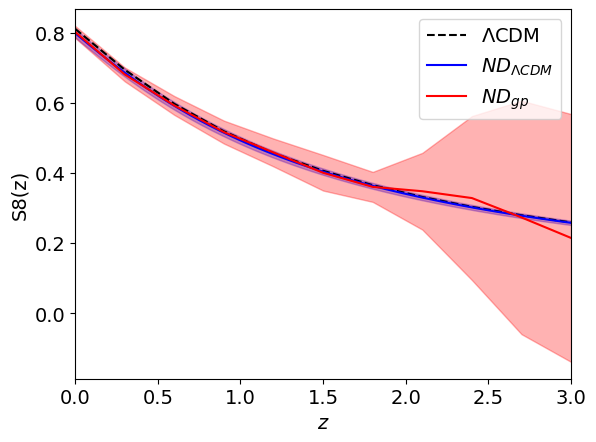

In [124]:
plt.plot(gp_z, LCDM_S8, 'k--', label=r"$\Lambda$CDM")

plt.plot(z_fine, S8_ND_RSD_m, 'b-', label=r"$ND_{\Lambda CDM}$")
plt.fill_between(z_fine, S8_ND_RSD_m+S8_ND_RSD_s, S8_ND_RSD_m-S8_ND_RSD_s, color='b', alpha=.3)

plt.plot(gp_z, S8_ND_RSD_gp_m, 'r-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, S8_ND_RSD_gp_m+S8_ND_RSD_gp_s, S8_ND_RSD_gp_m-S8_ND_RSD_gp_s, color='r', alpha=.3)

plt.xlabel(r"$z$")
plt.ylabel("S8(z)")
plt.xlim(0, 3)
plt.legend()

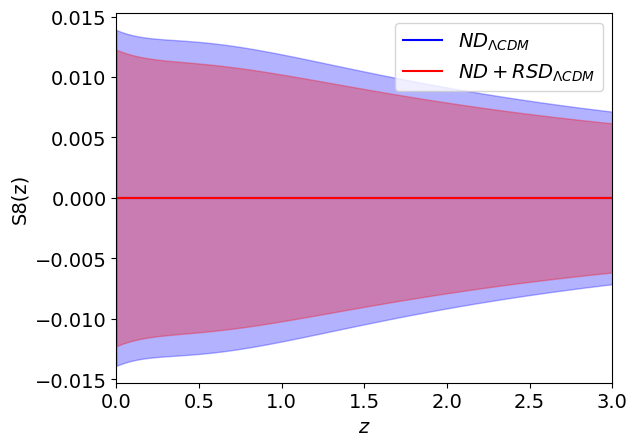

In [125]:
#plt.plot(gp_z, LCDM_S8, 'k--', label=r"$\Lambda$CDM")

plt.plot(z_fine, np.zeros(len(z_fine)), 'b-', label=r"$ND_{\Lambda CDM}$")
plt.fill_between(z_fine, S8_ND_s, -S8_ND_s, color='b', alpha=.3)

plt.plot(z_fine, np.zeros(len(z_fine)), 'r-', label=r"$ND+RSD_{\Lambda CDM}$")
plt.fill_between(z_fine, S8_ND_RSD_s, -S8_ND_RSD_s, color='r', alpha=.3)


#plt.plot(gp_z, np.zeros(len(gp_z)), 'r-', label=r"$ND_{gp}$")
#plt.fill_between(gp_z, S8_ND_RSD_gp_s, -S8_ND_RSD_gp_s, color='r', alpha=.3)

plt.xlabel(r"$z$")
plt.ylabel("S8(z)")
plt.xlim(0, 3)
#plt.ylim(0, 0.3)
plt.legend()

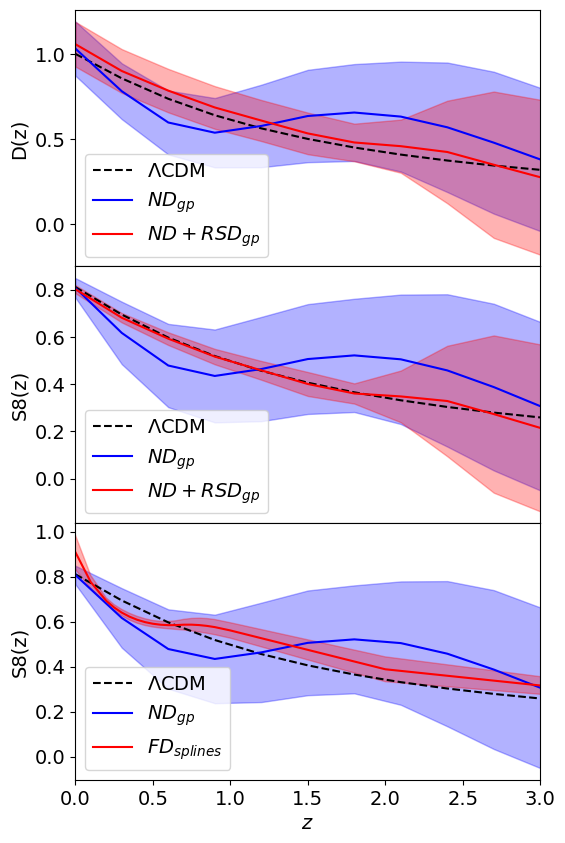

In [126]:
fig, axis = plt.subplots(3, 1, figsize=(6,10))
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[0].plot(gp_z, LCDM_Dz, 'k--', label=r"$\Lambda$CDM")
axis[0].plot(gp_z, gp_ND_m, 'b-', label=r"$ND_{gp}$")
axis[0].fill_between(gp_z, gp_ND_m+gp_ND_s, gp_ND_m-gp_ND_s, color='b', alpha=.3)

axis[0].plot(gp_z, gp_ND_RSD_m, 'r-', label=r"$ND+RSD_{gp}$")
axis[0].fill_between(gp_z, gp_ND_RSD_m+gp_ND_RSD_s, gp_ND_RSD_m-gp_ND_RSD_s, color='r', alpha=.3)
axis[0].set_xlabel(r"$z$")
axis[0].set_ylabel("D(z)")
axis[0].set_xlim([0,3])
axis[0].legend(loc=3)
axis[0].set_xticks([])

axis[1].plot(gp_z, LCDM_S8, 'k--', label=r"$\Lambda$CDM")
axis[1].plot(gp_z, S8_ND_gp_m, 'b-', label=r"$ND_{gp}$")
axis[1].fill_between(gp_z, S8_ND_gp_m+S8_ND_gp_s, S8_ND_gp_m-S8_ND_gp_s, color='b', alpha=.3)

axis[1].plot(gp_z, S8_ND_RSD_gp_m, 'r-', label=r"$ND+RSD_{gp}$")
axis[1].fill_between(gp_z, S8_ND_RSD_gp_m+S8_ND_RSD_gp_s, S8_ND_RSD_gp_m-S8_ND_RSD_gp_s, color='r', alpha=.3)

axis[1].set_xlabel(r"$z$")
axis[1].set_ylabel("S8(z)")
axis[1].set_xlim([0,3])
axis[1].legend(loc=3)
axis[1].set_xticks([])

axis[2].plot(gp_z, LCDM_S8, 'k--', label=r"$\Lambda$CDM")
axis[2].plot(gp_z, S8_ND_gp_m, 'b-', label=r"$ND_{gp}$")
axis[2].fill_between(gp_z, S8_ND_gp_m+S8_ND_gp_s, S8_ND_gp_m-S8_ND_gp_s, color='b', alpha=.3)
axis[2].plot(z_splines, S8_splines_m, 'r-', label=r"$FD_{splines}$")
axis[2].fill_between(z_splines, S8_splines_m+S8_splines_s, S8_splines_m-S8_splines_s, color='r', alpha=.3)
axis[2].set_xlabel(r"$z$")
axis[2].set_ylabel("S8(z)")
axis[2].set_xlim([0,3])
axis[2].legend(loc=3)

plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/gp_comp.pdf")

# fs8

In [127]:
BOSS = np.load("../data/fs8s/BOSS.npz")
eBOSS = np.load("../data/fs8s/eBOSS.npz")
Vipers = np.load("../data/fs8s/Vipers.npz")
sixdF = np.load("../data/fs8s/6dF.npz")
FastSound = np.load("../data/fs8s/FastSound.npz")
Wigglez = np.load("../data/fs8s/Wigglez.npz")

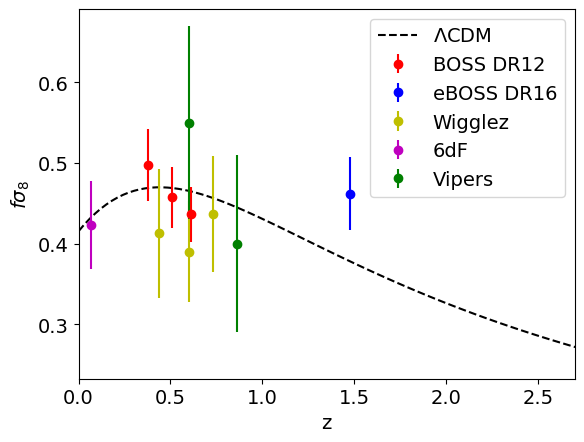

In [128]:
plt.plot(z, LCDM_fs8, 'k--', label=r"$\Lambda$CDM")
plt.errorbar(BOSS['z'], BOSS['data'], yerr=BOSS["err"], fmt='ro', label="BOSS DR12")
plt.errorbar(eBOSS['z'], eBOSS['data'], yerr=eBOSS["err"], fmt='bo', label="eBOSS DR16")
plt.errorbar(Wigglez['z'], Wigglez['data'], yerr=Wigglez["err"], fmt='yo', label="Wigglez")
plt.errorbar(sixdF['z'], sixdF['data'], yerr=sixdF["err"], fmt='mo', label="6dF")
plt.errorbar(Vipers['z'], Vipers['data'], yerr=Vipers["err"], fmt='go', label="Vipers")
#plt.plot(zs_fid, fs8_m, "b-", label="prior")
#plt.fill_between(zs_fid, fs8_m + fs8_s, fs8_m - fs8_s, color="b", alpha=.3)
plt.legend()
plt.ylabel(r"$f \sigma_8$")
plt.xlabel("z")
plt.xlim(0, 2.7)
plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/fs8_data.pdf")

In [129]:
z = np.linspace(0, 3, 100)
LCDM_fs8 = 0.81 * ccl.growth_factor(fid_cosmo, 1/(1+z))*ccl.growth_rate(fid_cosmo, 1/(1+z))

In [130]:
def add_fs8s(path):
    gps = []
    i = 1 
    while os.path.isfile(path+"fs8_{}.npz".format(i)):
        gp = np.load(path+"fs8_{}.npz".format(1))
        gps.append(gp)
        i += 1
    return np.concatenate(gps, 1)

In [131]:
fs8_DES_RSD_gp = add_fs8s("../chains/gcgc_gcwl_wlwl_fs8_TAP_0.6/")
fs8_DES_gp = add_fs8s("../chains/DES_full_gp_nos8_2_TAP_0.6/")
fs8_ND_RSD_gp = add_fs8s("../chains/ND_RSD_gp_TAP_0.6/")
fs8_ND_RSD_gp_hp = add_fs8s("../chains/ND_RSD_gp_hp_TAP_0.6/")
fs8_ND_RSD = add_fs8s("../chains/ND_RSD_TAP_0.6/")
fs8_ND = add_fs8s("../chains/ND_TAP_0.6/")

In [132]:
fs8_DES_gp_m, fs8_DES_gp_s, fs8_DES_gp_s1, fs8_DES__gps2 = get_m_s(fs8_DES_gp)
fs8_DES_RSD_gp_m, fs8_DES_RSD_gp_s, fs8_DES_RSD_gp_s1, fs8_DES_RSD_gp_s2 = get_m_s(fs8_DES_RSD_gp)
fs8_ND_RSD_gp_hp_m, fs8_ND_RSD_gp_hp_s, fs8_ND_RSD_gp_hp_s1, fs8_ND_RSD_gp_hp_s2 = get_m_s(fs8_ND_RSD_gp_hp)
fs8_ND_RSD_gp_m, fs8_ND_RSD_gp_s, fs8_ND_RSD_gp_s1, fs8_ND_RSD_gp_s2 = get_m_s(fs8_ND_RSD_gp)

fs8_ND_RSD_m, fs8_ND_RSD_s, fs8_ND_RSD_s1, fs8_ND_RSD_s2 = get_m_s(fs8_ND_RSD)
fs8_ND_m, fs8_ND_s, fs8_ND_s1, fs8_ND_s2 = get_m_s(fs8_ND)

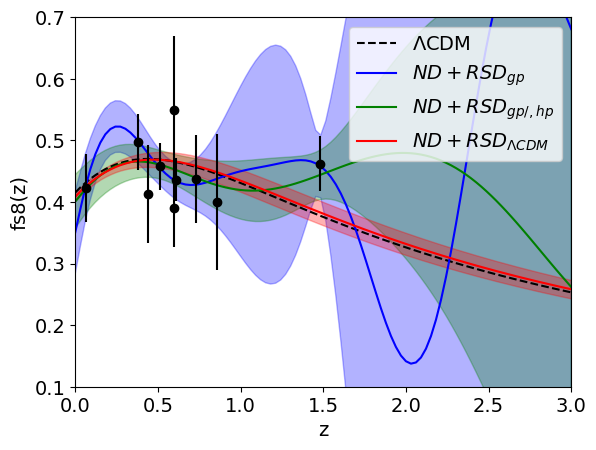

In [133]:
plt.plot(z, LCDM_fs8, 'k--', label=r"$\Lambda$CDM")

#plt.plot(z, fs8_DES_RSD_m, 'r-', label=r"$DES + RSD$")
#plt.fill_between(z, fs8_DES_RSD_m+fs8_DES_RSD_s, fs8_DES_RSD_m-fs8_DES_RSD_s, color='r', alpha=.3)

plt.plot(z, fs8_ND_RSD_gp_m, 'b-', label=r"$ND + RSD_{gp}$")
plt.fill_between(z, fs8_ND_RSD_gp_m+fs8_ND_RSD_gp_s, fs8_ND_RSD_gp_m-fs8_ND_RSD_gp_s, color='b', alpha=.3)

plt.plot(z, fs8_ND_RSD_gp_hp_m, 'g-', label=r"$ND + RSD_{gp /, hp}$")
plt.fill_between(z, fs8_ND_RSD_gp_hp_m+fs8_ND_RSD_gp_hp_s, fs8_ND_RSD_gp_hp_m-fs8_ND_RSD_gp_hp_s, color='g', alpha=.3)

plt.plot(z, fs8_ND_RSD_m, 'r-', label=r"$ND + RSD_{\Lambda CDM}$")
plt.fill_between(z, fs8_ND_RSD_m+fs8_ND_RSD_s, fs8_ND_RSD_m-fs8_ND_RSD_s, color='r', alpha=.3)

plt.errorbar(BOSS['z'], BOSS['data'], yerr=BOSS["err"], fmt='ko')#, label="BOSS")
plt.errorbar(eBOSS['z'], eBOSS['data'], yerr=eBOSS["err"], fmt='ko')#, label="eBOSS")
plt.errorbar(Wigglez['z'], Wigglez['data'], yerr=Wigglez["err"], fmt='ko')#, label="Wigglez")
plt.errorbar(sixdF['z'], sixdF['data'], yerr=sixdF["err"], fmt='ko')#, label="6dF")
plt.errorbar(Vipers['z'], Vipers['data'], yerr=Vipers["err"], fmt='ko')#, label="Vipers")

plt.ylabel("fs8(z)")
plt.xlabel("z")
plt.xlim(0, 3)
plt.ylim(0.1, 0.7)
plt.legend(loc='upper right')
plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/fs8_gp.pdf")

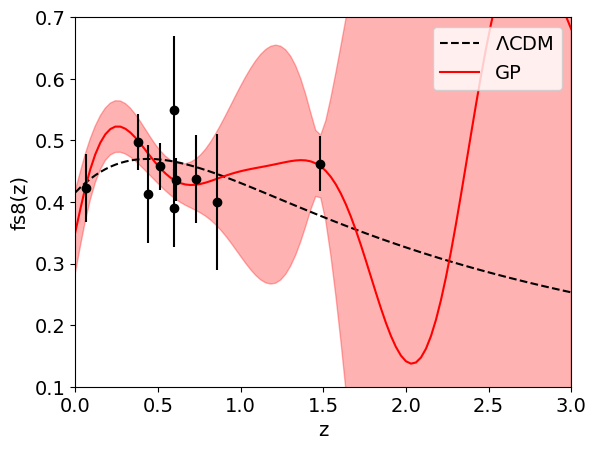

In [134]:
plt.plot(z, LCDM_fs8, 'k--', label=r"$\Lambda$CDM")

#plt.plot(z, fs8_DES_RSD_m, 'r-', label=r"$DES + RSD$")
#plt.fill_between(z, fs8_DES_RSD_m+fs8_DES_RSD_s, fs8_DES_RSD_m-fs8_DES_RSD_s, color='r', alpha=.3)

plt.plot(z, fs8_ND_RSD_gp_m, 'r-', label=r"GP")
plt.fill_between(z, fs8_ND_RSD_gp_m+fs8_ND_RSD_gp_s, fs8_ND_RSD_gp_m-fs8_ND_RSD_gp_s, color='r', alpha=.3)

#plt.plot(z, fs8_ND_RSD_gp_hp_m, 'g-', label=r"$ND + RSD_{gp /, hp}$")
#plt.fill_between(z, fs8_ND_RSD_gp_hp_m+fs8_ND_RSD_gp_hp_s, fs8_ND_RSD_gp_hp_m-fs8_ND_RSD_gp_hp_s, color='g', alpha=.3)

#plt.plot(z, fs8_ND_RSD_m, 'r-', label=r"$ND + RSD_{\Lambda CDM}$")
#plt.fill_between(z, fs8_ND_RSD_m+fs8_ND_RSD_s, fs8_ND_RSD_m-fs8_ND_RSD_s, color='r', alpha=.3)

plt.errorbar(BOSS['z'], BOSS['data'], yerr=BOSS["err"], fmt='ko')#, label="BOSS")
plt.errorbar(eBOSS['z'], eBOSS['data'], yerr=eBOSS["err"], fmt='ko')#, label="eBOSS")
plt.errorbar(Wigglez['z'], Wigglez['data'], yerr=Wigglez["err"], fmt='ko')#, label="Wigglez")
plt.errorbar(sixdF['z'], sixdF['data'], yerr=sixdF["err"], fmt='ko')#, label="6dF")
plt.errorbar(Vipers['z'], Vipers['data'], yerr=Vipers["err"], fmt='ko')#, label="Vipers")

plt.ylabel("fs8(z)")
plt.xlabel("z")
plt.xlim(0, 3)
plt.ylim(0.1, 0.7)
plt.legend(loc='upper right')
plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/fs8_gp.pdf")